## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Reading data

Note that we dismiss Canary Islands, Balearic Islands Ceuta and Melilla because they are not considered in the demand data 

In [2]:
cities = pd.read_csv('cities_unified.csv', header = 0)
cities = cities[(cities['Provincias'] != 'Melilla') & (cities['Provincias'] != 'Ceuta') & (cities['Provincias'] != 'Santa Cruz de Tenerife') & (cities['Provincias'] != 'Palmas, Las') & (cities['Provincias'] != 'Balears, Illes')]
cities.reset_index(drop=True, inplace = True)
cities.tail()

Codigos    Provincias    Latitud  Longitud      2014      2015      2016  \
43       47    Valladolid  41.634126 -4.847191    529157    526288    523679   
44       48       Bizkaia  43.237680 -2.852600   1151905   1148775   1147576   
45       49        Zamora  41.727174 -5.980539    185432    183436    180406   
46       50      Zaragoza  41.620365 -1.064497    960111    956006    950507   
47        0  TOTAL ESPAÑA  39.695119 -3.202023  46771341  46624382  46557008   

        2017      2018      2019      2020      2021      2022      2023  
43    521130    519851    519546    520649    519361    517975    521333  
44   1148302   1149628   1152651   1159443   1154334   1149344   1153282  
45    177404    174549    172539    170588    168725    167215    166927  
46    953486    954811    964693    972528    967452    966438    979365  
47  46572132  46722980  47026208  47450795  47385107  47475420  48085361

In [3]:
ipc = pd.read_csv('IPC.csv', header = 0)
ipc = ipc[(ipc['Provincia'] != 'Melilla') & (ipc['Provincia'] != 'Ceuta') & (ipc['Provincia'] != 'Santa Cruz de Tenerife') & (ipc['Provincia'] != 'Palmas, Las') & (ipc['Provincia'] != 'Balears, Illes')]
ipc.reset_index(drop=True, inplace = True)
ipc.tail()

Codigo     Provincia  1-2014  2-2014  3-2014  4-2014  5-2014  6-2014  \
43      47    Valladolid   93498   93451   93566   94419   94369   94419   
44      48       Bizkaia   92529   92402   92640   93555   93525   93561   
45      49        Zamora   93284   93234   93511   94390   94414   94352   
46      50      Zaragoza   93588   93570   93708   94676   94661   94614   
47       0  TOTAL ESPAÑA   93373   93333   93541   94373   94395   94421   

    7-2014  8-2014  ...  3-2023  4-2023  5-2023  6-2023  7-2023  8-2023  \
43   93600   93776  ...  111670  112360  112194  112770  112780  113328   
44   92738   92900  ...  111128  111660  111744  112665  112700  113205   
45   93307   93525  ...  113086  113937  113791  114536  114620  115011   
46   93792   93965  ...  110967  111417  111269  111873  112310  112893   
47   93533   93681  ...  111111  111773  111719  112354  112544  113149   

    9-2023  10-2023  11-2023  12-2023  
43  113457   114086   113459   113537  
44  113485   113534   113198   113152  
45  115115   115517   114885   115055  
46  112907   113042   112828   112710  
47  113348   113676   113280   113308  

[5 rows x 122 columns]

In [4]:
demanda_meteo = pd.read_csv('demanda_meteo.csv', header = 0)
demanda_meteo['Datetime'] = pd.to_datetime(demanda_meteo['Datetime'])
demanda_meteo.head()

Datetime  Demanda Real  Demanda Prevista  Demanda Programada  \
0 2014-01-01 00:00:00   24301.66667       23878.33333             24099.0   
1 2014-01-01 01:00:00   23365.33333       23322.00000             22269.0   
2 2014-01-01 02:00:00   21672.50000       21711.16667             21136.0   
3 2014-01-01 03:00:00   20192.00000       20230.33333             19911.0   
4 2014-01-01 04:00:00   19220.66667       19215.33333             19060.0   

   Demanda D+1  Precio  temperature_2m_1  direct_normal_irradiance_instant_1  \
0          0.0   37.21            7.4985                                 0.0   
1          0.0   30.57            7.0485                                 0.0   
2          0.0   26.30            7.3985                                 0.0   
3          0.0   26.18            7.3485                                 0.0   
4          0.0   22.40            7.4985                                 0.0   

   wind_speed_100m_1  temperature_2m_2  ...  wind_speed_100m_50  \
0          16.099690             7.874  ...           30.758411   
1          17.388409             7.724  ...           30.312773   
2          19.319628             7.574  ...           27.792374   
3          20.140705             7.424  ...           25.772078   
4          21.995380             7.374  ...           23.732710   

   temperature_2m_51  direct_normal_irradiance_instant_51  wind_speed_100m_51  \
0          11.714001                                  0.0           17.339897   
1          11.614000                                  0.0           18.000000   
2          11.564000                                  0.0           17.651016   
3          11.464001                                  0.0           18.430452   
4          11.464001                                  0.0           18.161278   

   temperature_2m_52  direct_normal_irradiance_instant_52  wind_speed_100m_52  \
0          10.032000                                  0.0           11.659777   
1           9.731999                                  0.0           10.661107   
2           9.932000                                  0.0           11.212135   
3          10.432000                                  0.0           12.620554   
4          10.582000                                  0.0           14.058450   

   temperature_2m_0  direct_normal_irradiance_instant_0  wind_speed_100m_0  
0          5.791485                                 0.0          18.565381  
1          5.709594                                 0.0          18.443398  
2          5.620734                                 0.0          18.401250  
3          5.597380                                 0.0          18.198554  
4          5.656951                                 0.0          18.100382  

[5 rows x 165 columns]

In [5]:
festivos = pd.read_csv('Festivos.csv', header = 0)
festivos['Day'] = pd.to_datetime(festivos['Day'])
festivos = festivos.drop(['Melilla', 'Ceuta', 'Santa Cruz de Tenerife', 'Palmas, Las', 'Balears, Illes'], axis = 1)
festivos.head()

Day Day of the week  Coruña, A  Albacete  Alicante/Alacant  Almería  \
0 2014-01-01               X          1         1                 1        1   
1 2014-01-02               J          0         0                 0        0   
2 2014-01-03               V          0         0                 0        0   
3 2014-01-04               S          0         0                 0        0   
4 2014-01-05               D          0         0                 0        0   

   Araba/Álava  Asturias  Badajoz  Barcelona  ...  Soria  Tarragona  Teruel  \
0            1         1        1          1  ...      1          1       1   
1            0         0        0          0  ...      0          0       0   
2            0         0        0          0  ...      0          0       0   
3            0         0        0          0  ...      0          0       0   
4            0         0        0          0  ...      0          0       0   

   Toledo  Valencia/València  Valladolid  Zamora  Zaragoza  Ávila  sumafest  
0       1                  1           1       1         1      1  1.000000  
1       0                  0           0       0         0      0  0.019659  
2       0                  0           0       0         0      0  0.000000  
3       0                  0           0       0         0      0  0.000000  
4       0                  0           0       0         0      0  1.000000  

[5 rows x 50 columns]

In [6]:
pib = pd.read_csv('PIB.csv', header = 0)
pib.head()

Codigo     Provincia  1-2014  2-2014  3-2014  4-2014  5-2014  6-2014  \
0       0  TOTAL ESPAÑA  925468  925468  925468  969598  969598  969598   

   7-2014  8-2014  ...   3-2023   4-2023   5-2023   6-2023   7-2023   8-2023  \
0  960418  960418  ...  1099141  1139036  1139036  1139036  1127405  1127405   

    9-2023  10-2023  11-2023  12-2023  
0  1127405  1171293  1171293  1171293  

[1 rows x 122 columns]

## X and Y creation and definition of the metrics

In [7]:
años_train = 8
años_validation = 1
años_test = 10 - años_train - años_validation

start_year = 2014
days_year = [365,365,366,365,365,365,366,365,365,365]
days_month = [31,28,31,30,31,30,31,31,30,31,30,31]
days_bisiesto = [31,29,31,30,31,30,31,31,30,31,30,31]

days_training = sum (days_year[:años_train]) - 7
hours_training = 24*days_training - 168
print (hours_training)

days_validation = sum (days_year[años_train:años_train+años_validation]) 
hours_validation = 24*days_validation 
print (hours_validation)

days_testing = sum(days_year[años_train+años_validation:])
hours_testing = 24*days_testing
print (hours_testing)

69792
8760
8760


In [8]:
demanda_meteo['Datetime'][0].year

2014

In [9]:
x = []
x_train = []
x_val = []
x_test = []
y = []
y_train = []
y_val = []
y_test = []
prevision = []
prevision_train = []
prevision_val = []
prevision_test = []

In [10]:
provincias = cities['Provincias'][:-1]

In [11]:
flag = 0
for i in range (len(festivos)):
    suma = 0
    cont = 0
    sumapob = sum(cities[str(festivos['Day'][i].year)][:-1])
    for name in provincias:
        auxsum = festivos[name][i]*cities.loc[cities['Provincias'] == name][str(festivos['Day'][i].year)][cont]
        suma += auxsum
        cont += 1
    #print (suma/sumapob)
    sumafest = suma/sumapob
    for h in range (24):
        try:
            aux = []
            aux.append(festivos['Day'][i].day)
            aux.append(festivos['Day'][i].month)
            for j in range (7):
                if festivos['Day'][i].weekday() == j:
                    aux.append(1)
                else:
                    aux.append(0)
            aux.append(sumafest)
            aux.append(ipc[str(festivos['Day'][i].month)+'-'+str(festivos['Day'][i].year)][47])
            aux.append(pib[str(festivos['Day'][i].month)+'-'+str(festivos['Day'][i].year)][0])
#             aux.append(demanda_meteo['Precio'][24*(i-2)+h])
            aux.append(demanda_meteo['temperature_2m_0'][24*i+h])
            aux.append(demanda_meteo['Demanda Real'][24*(i-1)+h])
            aux.append(demanda_meteo['temperature_2m_0'][24*(i-1)+h])
            aux.append(demanda_meteo['Demanda Real'][24*(i-7)+h])
            aux.append(demanda_meteo['Demanda Real'][24*(i-14)+h])
            
#             print (aux)
            
        except:
            continue
    
        if int (festivos['Day'][i].year) - start_year < años_train:
            if flag == 0:
                print (24*i+h)
                flag = 1
            x_train.append(np.array(aux))
            y_train.append(demanda_meteo['Demanda Real'][24*(i)+h])
            prevision_train.append(demanda_meteo['Demanda Prevista'][24*(i)+h])
        
        elif int (festivos['Day'][i].year) - start_year >= años_train and int (festivos['Day'][i].year) - start_year < años_train + años_validation:
            if flag == 1:
                print (24*i+h)
                flag = 2
            x_val.append(np.array(aux))
            y_val.append(demanda_meteo['Demanda Real'][24*(i)+h])
            prevision_val.append(demanda_meteo['Demanda Prevista'][24*(i)+h])
        
        else:
            if flag == 2:
                print (24*i+h)
                flag = 3
            x_test.append(np.array(aux))
            y_test.append(demanda_meteo['Demanda Real'][24*(i)+h])
            prevision_test.append(demanda_meteo['Demanda Prevista'][24*(i)+h])
        
        x.append(np.array(aux))
        y.append(demanda_meteo['Demanda Real'][24*(i)+h])
        prevision.append(demanda_meteo['Demanda Prevista'][24*(i)+h])

len(x)

336
70128
78888


87312

In [12]:
def metrics (preds, val, normalized = False):
    df = {}
    if normalized:
        auxpreds = np.array(preds)*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
        auxval = np.array(val)*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
    else:
        auxpreds = np.array(preds)
        auxval = np.array(val)
#     all_hours = pd.date_range(start=df['Date'].min(), end=df['Date'].max() + pd.Timedelta(days=1), freq='H')[:-1]

    df['Datetime'] = demanda_meteo[(demanda_meteo['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (demanda_meteo['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]['Datetime']
    df['Error'] = auxpreds-auxval
    df['Absolute Error'] = abs(df['Error'])
    df['Squared Error'] = (auxpreds-auxval)*(auxpreds-auxval)
    df['Relative Error'] = 100*abs((auxpreds-auxval)/auxval)
    overall = [np.sqrt(np.mean(df['Error']*df['Error'])), np.mean(df['Absolute Error']), np.mean (df['Relative Error']), max(df['Absolute Error'])]
    
    # Assuming your dictionary is named 'data_dict'
    # Concatenate dataframes from the dictionary into one large dataframe
#     combined_df = pd.concat([d.assign(datetime=pd.to_datetime(df['Datetime'], format='%d-%m-%Y') + pd.DateOffset(hours=hour)) 
#                              for hour, d in df.items()])
#     combined_df = pd.concat([d for d in df.items()])

    print([[name, len(df[name])] for name in df.keys()])
    df = pd.DataFrame(df)
    # Sort the dataframe by the datetime column
    df = df.sort_values(by='Datetime')

    # Convert datetime column to the desired format (day-month-year hour)
#     combined_df['Datetime'] = combined_df['Datetime'].dt.strptime(combined_df['Datetime'], '%Y-%m-%d %H:%M:%S')

    # Optionally, reset index if needed
    df = df.reset_index(drop=True)

    # Now, combined_df contains the concatenated and sorted dataframe with the desired datetime format,
    # where the hour comes from the key of the dictionary
    
    return df,overall
#     return combined_df

## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train+x_val, y_train+y_val)
linear_predictions = linear_model.predict(x_test)

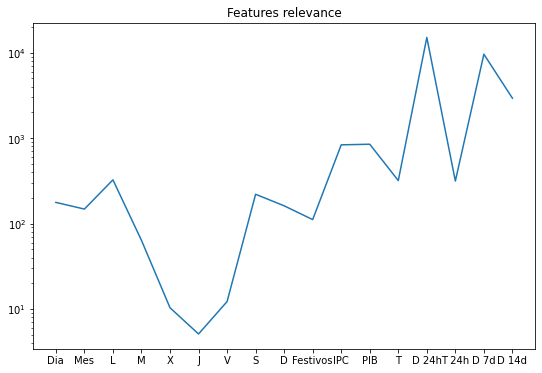

In [14]:
labels = ['Dia', 'Mes', 'L', 'M', 'X', 'J', 'V', 'S', 'D', 'Festivos', 'IPC', 'PIB', 'T', 'D 24h', 'T 24h', 'D 7d', 'D 14d']
plt.figure(figsize=(9,6))
aux = {i:0 for i in range(len(x_train[0]))}
n = len(x_train)
for i in range (len(x_train)):
    for j in range (len(x_train[0])):
        aux[j] += x_train[i][j]/n
relevance = [abs(aux[i]*linear_model.coef_[i]) for i in range (len(aux))]
plt.title ('Features relevance')
plt.plot (labels, relevance)
#print (linear_models[h].coef_, aux, [abs(aux[i]*linear_models[h].coef_[i]) for i in range (len(aux))])
plt.yscale('log')
plt.show()

In [15]:
df_linear, linear_metrics = metrics(linear_predictions, y_test)
linear_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1262.7228773896459, 935.7562840567128, 3.6242416879045214, 6947.238980582017]

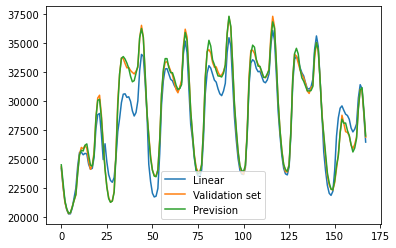

In [16]:
plt.plot(linear_predictions[24*7*8:24*7*9], label = 'Linear')
plt.plot(y_test[24*7*8:24*7*9], label = 'Validation set')
plt.plot(prevision_test[24*7*8:24*7*9], label = 'Prevision')
plt.legend()
plt.show()

## SVM

In [17]:
# from sklearn.svm import SVR
# from skopt import BayesSearchCV

# param_space = {
#     'C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
#     'gamma': (1e-6, 1e+1, 'log-uniform'),
#     }

# # Initialize BayesSearchCV
# opt = BayesSearchCV(
#     SVR(),
#     param_space,
#     cv=5,
#     n_iter=10,  # Number of iterations of Bayesian optimization
#     n_jobs=-1  # Utilize all available cores
# )

# # Fit BayesSearchCV
# opt.fit(x_train+x_val, y_train+y_val)

# # Print best hyperparameters found
# print("Best hyperparameters:", opt.best_params_)

# # Get the best classifier
# SVR_model = opt.best_estimator_

# SVR_predictions = SVR_model.predict(x_test)

In [18]:
# from sklearn.svm import SVR

# SVR_model = SVR()

# #fitting the model for grid search 
# SVR_model.fit(x_train+x_val, y_train+y_val) 

# # SVR_models = SVR(C=10).fit(x_train+x_val, y_train+y_val)
# SVR_prediction = SVR_models.predict(x_test)

In [19]:
# df_SVR, SVR_metrics = metrics(SVR_predictions, y_test)
# SVR_metrics

In [20]:
# plt.plot(SVR_predictions[:24*7], label = 'SVM')
# plt.plot(y_test[:24*7], label = 'Validation set')
# plt.plot(prevision_test[:24*7], label = 'Prevision')
# plt.legend(loc='lower left')
# plt.show()

## XGBoost

### One model for all the dataset

In [21]:
from xgboost.sklearn import XGBRegressor

XGB_model = XGBRegressor().fit(x_train+x_val, y_train+y_val)
XGB_predictions = XGB_model.predict(x_test)

In [22]:
df_XGB, XGB_metrics = metrics(XGB_predictions, y_test)
XGB_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1021.1462801128089, 747.3842701850742, 2.887262652086776, 7550.1875]

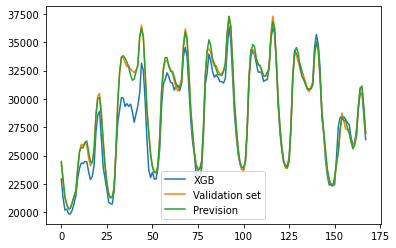

In [23]:
plt.plot(XGB_predictions[24*7*8:24*7*9], label = 'XGB')
plt.plot(y_test[24*7*8:24*7*9], label = 'Validation set')
plt.plot(prevision_test[24*7*8:24*7*9], label = 'Prevision')
plt.legend()
plt.show()

# Regressive Models

In [24]:
# lags = sorted([24*i-1 for i in range(2, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)])
lags = [24*i for i in range (1,15)]
lags

[24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288, 312, 336]

In [25]:
def plot_evolution (y_,predictions,prevision,ndias=100):
    plt.title ('Evolucion de predicciones')
    plt.plot(predictions[:ndias], label = 'XGB')
    plt.plot(y_[:ndias], label = 'Validation set')
    plt.plot(prevision[:ndias], label = 'Prevision')
    plt.legend(loc='lower left')
    plt.show()

### Pure AutoReg model

In [26]:
def predict_ar (model, y_, start, npreds, lags=lags):
    cont = 0
    preds_list = []
    coef = np.array(model.params)
    while cont < npreds:
        
        aux = np.zeros(len(lags))
        
        for i,l in enumerate(lags):
            aux[i] = y[start+cont-l]

        preds = sum (coef[1:]*aux) + coef[0]

        preds_list.append(preds)

        cont += 1
    
    return preds_list

In [27]:
from statsmodels.tsa.ar_model import AutoReg

AR_model = AutoReg(y_train + y_val, lags=lags).fit()
# print('Coefficients: %s' % model.params)
AR_predictions = predict_ar (AR_model, y, len(y_train+y_val), len(y_test))

In [28]:
df_AR, AR_metrics = metrics(AR_predictions, y_test)
AR_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1365.2315546035013, 888.3690144487201, 3.4205152125899674, 12121.901251572694]

### AR-XGB

In [29]:
def predict (forecaster, y_, start, npreds, lags=lags,steps = 24):
    cont = 0
    preds_list = []
    start_window = start-max(lags)
    end_window = start
    while cont < npreds:
        window = pd.Series(y_[start_window:end_window])

        preds = forecaster.predict(steps=steps,last_window=window)

        preds_list.append(list(preds))

        cont += steps
        start_window += steps
        end_window += steps

    predictions = [item for sublist in preds_list for item in sublist]
    
    return predictions

In [30]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Crear el forecaster
# ==============================================================================
AR_XGB_model = ForecasterAutoreg(
                 regressor = XGBRegressor(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags
            )
             
# Entrena el forecaster
# ==============================================================================
AR_XGB_model.fit(y=pd.Series(y_train+y_val))
# forecaster

In [31]:
AR_XGB_predictions = predict (AR_XGB_model, y, len(y_train+y_val), len(y_test))

In [32]:
df_AR_XGB, AR_XGB_metrics = metrics(AR_XGB_predictions, y_test)
AR_XGB_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1187.1882289761284, 772.7891530615012, 2.9994110630551956, 10948.171220625001]

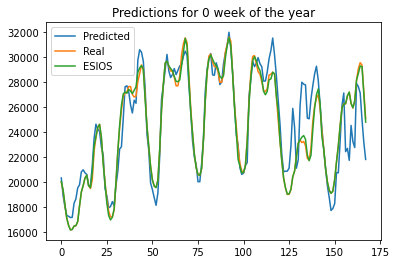

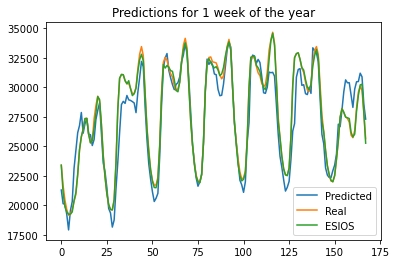

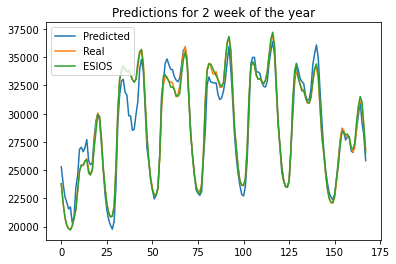

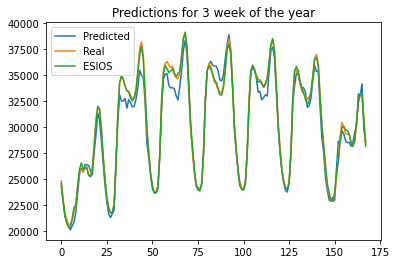

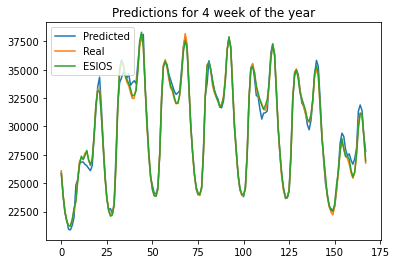

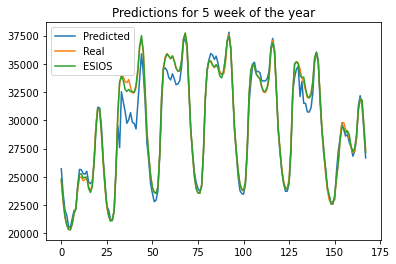

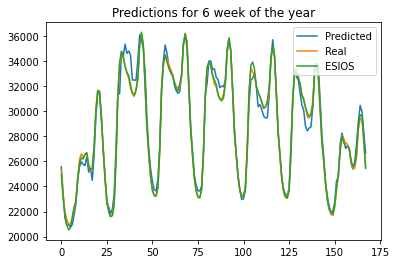

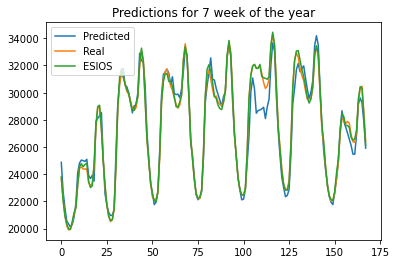

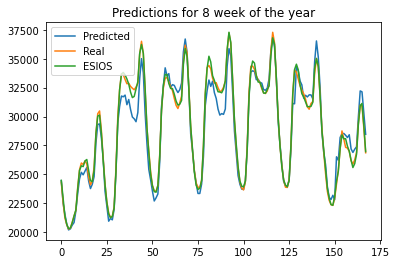

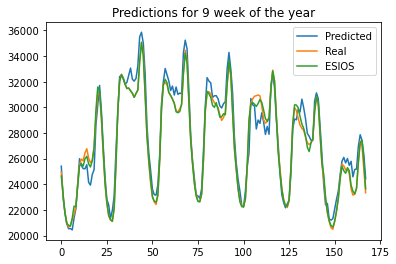

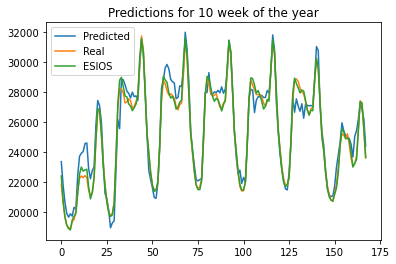

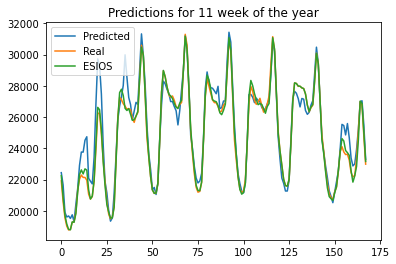

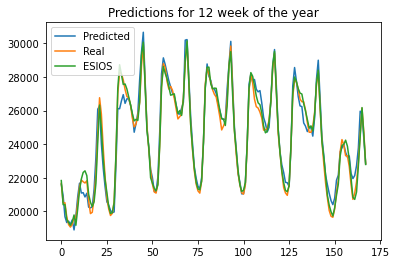

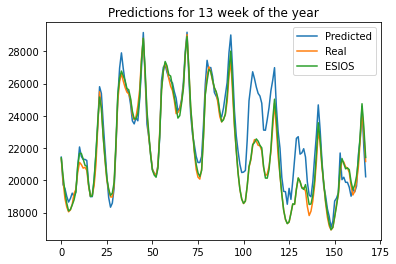

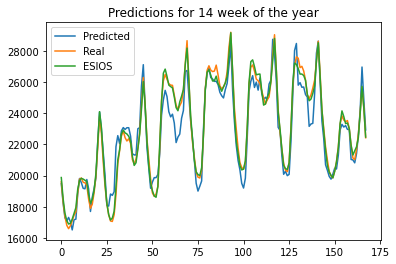

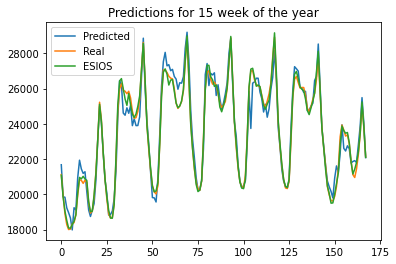

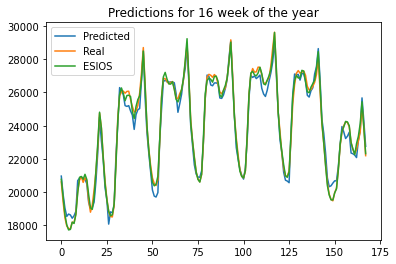

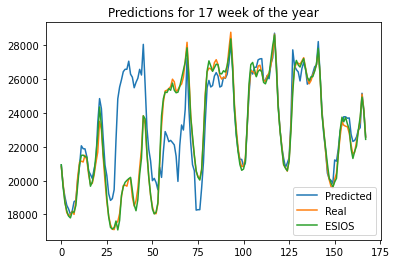

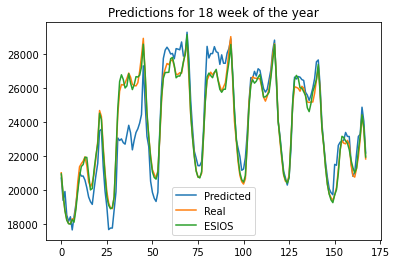

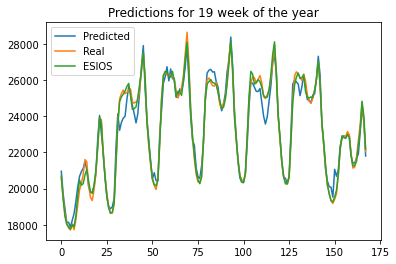

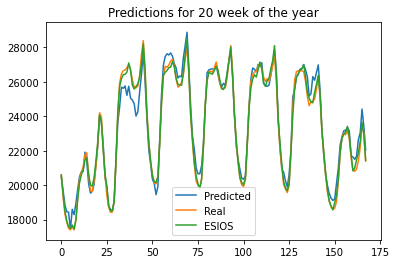

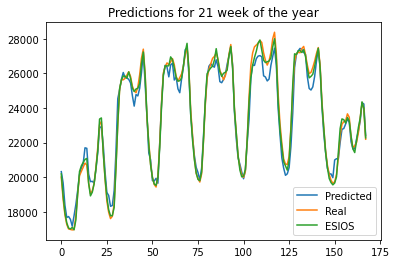

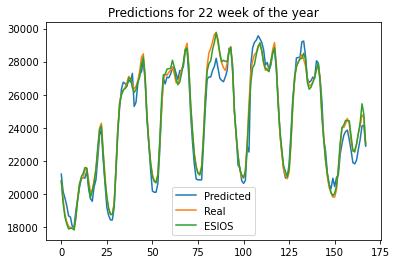

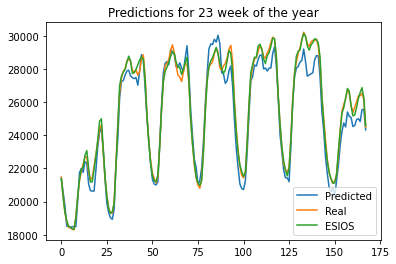

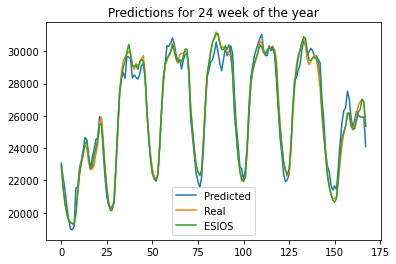

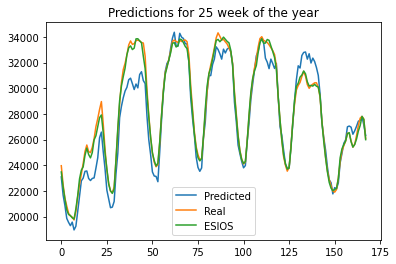

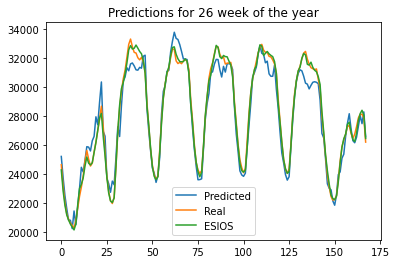

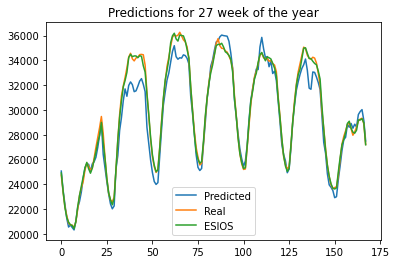

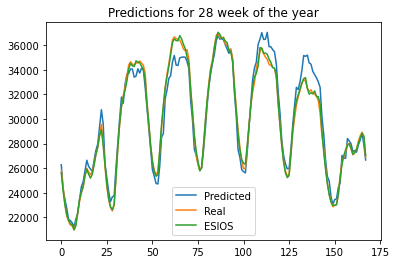

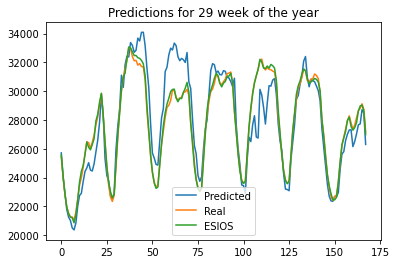

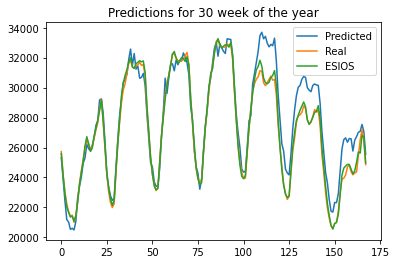

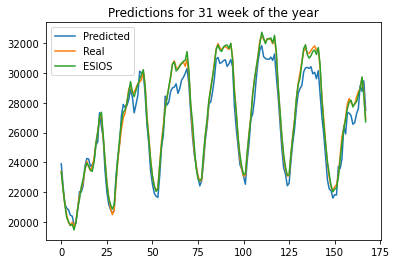

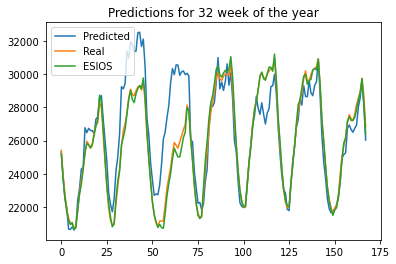

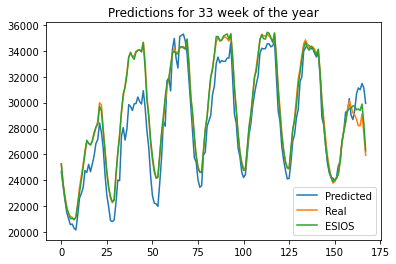

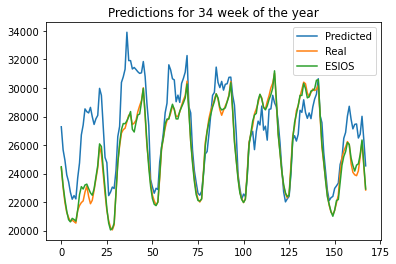

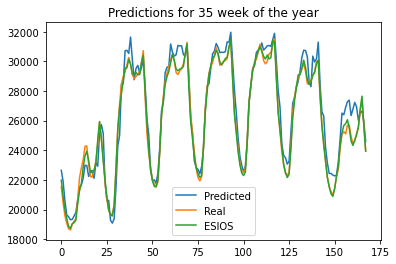

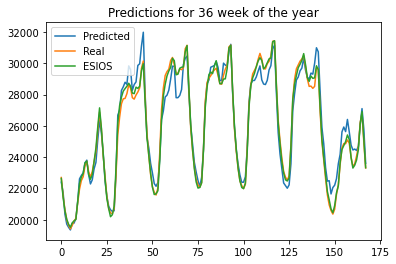

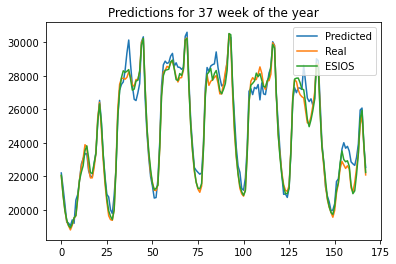

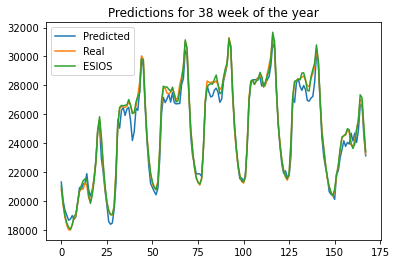

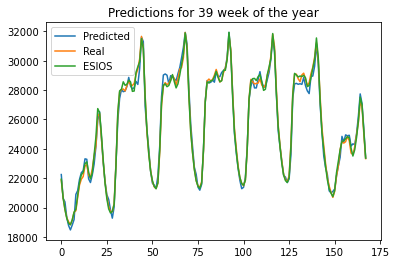

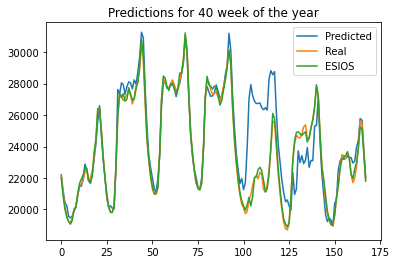

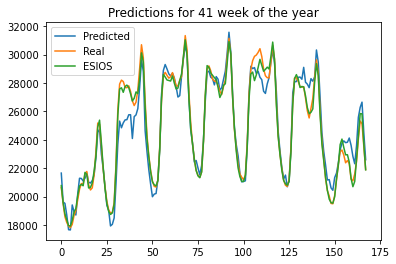

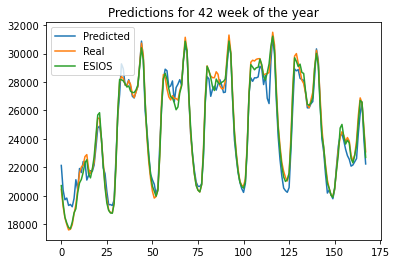

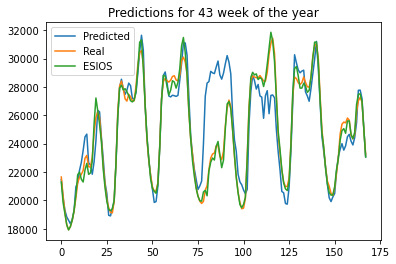

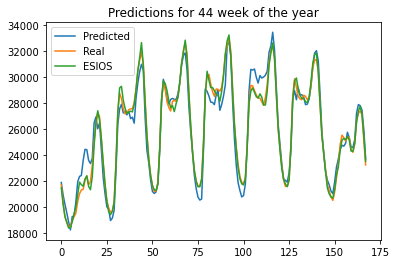

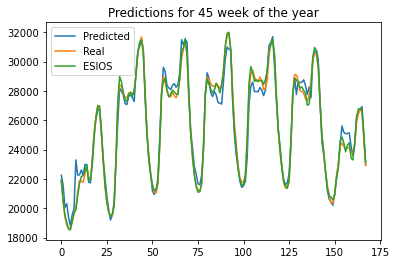

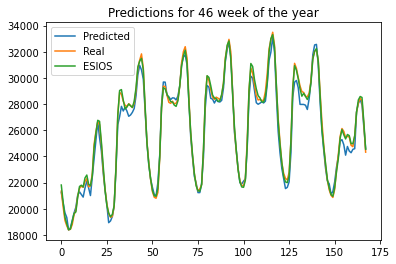

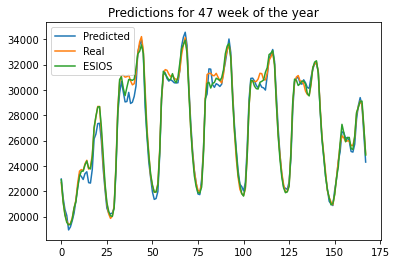

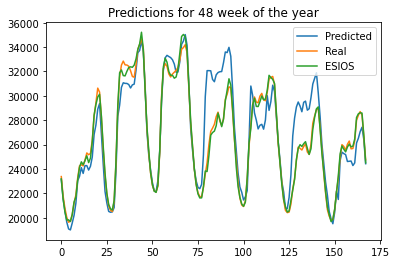

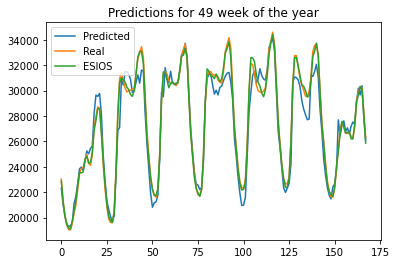

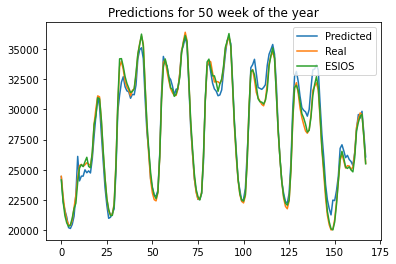

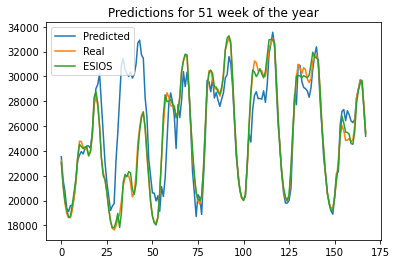

In [33]:
for i in range (52):
    plt.title ('Predictions for ' + str (i) + ' week of the year')
    plt.plot(AR_XGB_predictions[24*7*i:(i+1)*24*7], label='Predicted')
    plt.plot(y_test[24*7*i:(i+1)*24*7], label = 'Real')
    plt.plot(prevision_test[24*7*i:(i+1)*24*7], label='ESIOS')
    plt.legend()
    plt.show()

# NN

### 1 output only

In [34]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

In [35]:
from tensorflow import keras
from keras import layers

input_shape = len(x_train[0])
output_shape = 1

NN_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        #layers.Dense(output_shape, activation="relu"),
        layers.Dense(output_shape, activation="linear"),
    ]
)

In [36]:
batch_size = 1024
epochs = 4000

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mean_absolute_error(y_true, y_pred):
        return (K.mean(abs(y_pred - y_true)))

def maximum_error(y_true, y_pred):
    return (K.max(abs(y_pred - y_true)))


NN_model.compile(loss=root_mean_squared_error, optimizer="adam")
#model.compile(loss=mean_absolute_error, optimizer="adam")
#model.compile(loss=maximum_error, optimizer="adam")

x_trainaux = [list(x) for x in x_train]
x_valaux = [list(x) for x in x_val]

history = NN_model.fit(x_trainaux, y_train, validation_data = (x_valaux,y_val), batch_size=batch_size, epochs=epochs)

Epoch 1/4000
69/69 [==============================] - 1s 15ms/step - loss: 9213.1377 - val_loss: 4686.7642
Epoch 2/4000
69/69 [==============================] - 0s 4ms/step - loss: 3669.2639 - val_loss: 3760.8799
Epoch 3/4000
69/69 [==============================] - 0s 4ms/step - loss: 2471.4729 - val_loss: 1777.9761
Epoch 4/4000
69/69 [==============================] - 0s 4ms/step - loss: 1997.5350 - val_loss: 1816.6731
Epoch 5/4000
69/69 [==============================] - 0s 4ms/step - loss: 1793.1538 - val_loss: 1903.9059
Epoch 6/4000
69/69 [==============================] - 0s 4ms/step - loss: 1847.5947 - val_loss: 1816.9454
Epoch 7/4000
69/69 [==============================] - 0s 4ms/step - loss: 1843.9800 - val_loss: 1811.2469
Epoch 8/4000
69/69 [==============================] - 0s 4ms/step - loss: 1782.8699 - val_loss: 1685.0667
Epoch 9/4000
69/69 [==============================] - 0s 4ms/step - loss: 1791.8112 - val_loss: 2295.0964
Epoch 10/4000
69/69 [========================

69/69 [==============================] - 0s 4ms/step - loss: 1678.3229 - val_loss: 1809.2914
Epoch 154/4000
69/69 [==============================] - 0s 4ms/step - loss: 1678.5140 - val_loss: 1602.5642
Epoch 155/4000
69/69 [==============================] - 0s 4ms/step - loss: 1674.8162 - val_loss: 1632.9504
Epoch 156/4000
69/69 [==============================] - 0s 4ms/step - loss: 1660.0426 - val_loss: 1606.4510
Epoch 157/4000
69/69 [==============================] - 0s 4ms/step - loss: 1673.2102 - val_loss: 1675.0728
Epoch 158/4000
69/69 [==============================] - 0s 4ms/step - loss: 1662.3440 - val_loss: 1622.5702
Epoch 159/4000
69/69 [==============================] - 0s 4ms/step - loss: 1659.1891 - val_loss: 1597.5892
Epoch 160/4000
69/69 [==============================] - 0s 4ms/step - loss: 1704.1509 - val_loss: 1616.6887
Epoch 161/4000
69/69 [==============================] - 0s 4ms/step - loss: 1668.4363 - val_loss: 1607.0258
Epoch 162/4000
69/69 [=====================

Epoch 229/4000
69/69 [==============================] - 0s 4ms/step - loss: 1602.6776 - val_loss: 1583.1697
Epoch 230/4000
69/69 [==============================] - 0s 4ms/step - loss: 1599.2930 - val_loss: 1593.5150
Epoch 231/4000
69/69 [==============================] - 0s 4ms/step - loss: 1604.6062 - val_loss: 1584.8834
Epoch 232/4000
69/69 [==============================] - 0s 4ms/step - loss: 1603.3385 - val_loss: 1614.7704
Epoch 233/4000
69/69 [==============================] - 0s 4ms/step - loss: 1671.3616 - val_loss: 1636.3606
Epoch 234/4000
69/69 [==============================] - 0s 4ms/step - loss: 1614.4927 - val_loss: 1603.0802
Epoch 235/4000
69/69 [==============================] - 0s 4ms/step - loss: 1598.8937 - val_loss: 1601.8765
Epoch 236/4000
69/69 [==============================] - 0s 4ms/step - loss: 1616.1908 - val_loss: 1658.3978
Epoch 237/4000
69/69 [==============================] - 0s 4ms/step - loss: 1616.7665 - val_loss: 1709.4706
Epoch 238/4000
69/69 [======

Epoch 305/4000
69/69 [==============================] - 0s 4ms/step - loss: 1584.8092 - val_loss: 1567.1464
Epoch 306/4000
69/69 [==============================] - 0s 4ms/step - loss: 1576.0922 - val_loss: 1599.9181
Epoch 307/4000
69/69 [==============================] - 0s 4ms/step - loss: 1590.1271 - val_loss: 1693.3521
Epoch 308/4000
69/69 [==============================] - 0s 4ms/step - loss: 1583.5712 - val_loss: 1580.7212
Epoch 309/4000
69/69 [==============================] - 0s 4ms/step - loss: 1584.9431 - val_loss: 1581.4667
Epoch 310/4000
69/69 [==============================] - 0s 4ms/step - loss: 1580.1539 - val_loss: 1572.3826
Epoch 311/4000
69/69 [==============================] - 0s 4ms/step - loss: 1602.3223 - val_loss: 1664.3138
Epoch 312/4000
69/69 [==============================] - 0s 4ms/step - loss: 1605.8289 - val_loss: 1598.2418
Epoch 313/4000
69/69 [==============================] - 0s 4ms/step - loss: 1599.9465 - val_loss: 1623.1958
Epoch 314/4000
69/69 [======

Epoch 381/4000
69/69 [==============================] - 0s 4ms/step - loss: 1599.0920 - val_loss: 1828.2277
Epoch 382/4000
69/69 [==============================] - 0s 4ms/step - loss: 1590.0004 - val_loss: 1647.2894
Epoch 383/4000
69/69 [==============================] - 0s 4ms/step - loss: 1564.2126 - val_loss: 1621.7025
Epoch 384/4000
69/69 [==============================] - 0s 4ms/step - loss: 1558.1664 - val_loss: 1650.8732
Epoch 385/4000
69/69 [==============================] - 0s 4ms/step - loss: 1575.7744 - val_loss: 1724.0896
Epoch 386/4000
69/69 [==============================] - 0s 4ms/step - loss: 1555.0270 - val_loss: 1632.3307
Epoch 387/4000
69/69 [==============================] - 0s 4ms/step - loss: 1564.8933 - val_loss: 1585.3800
Epoch 388/4000
69/69 [==============================] - 0s 4ms/step - loss: 1568.7247 - val_loss: 1701.2108
Epoch 389/4000
69/69 [==============================] - 0s 4ms/step - loss: 1581.9186 - val_loss: 1580.9169
Epoch 390/4000
69/69 [======

Epoch 457/4000
69/69 [==============================] - 0s 4ms/step - loss: 1551.6644 - val_loss: 1622.3654
Epoch 458/4000
69/69 [==============================] - 0s 4ms/step - loss: 1551.0713 - val_loss: 1600.6663
Epoch 459/4000
69/69 [==============================] - 0s 4ms/step - loss: 1531.2623 - val_loss: 1615.8951
Epoch 460/4000
69/69 [==============================] - 0s 4ms/step - loss: 1556.5381 - val_loss: 1559.4652
Epoch 461/4000
69/69 [==============================] - 0s 4ms/step - loss: 1533.5092 - val_loss: 1566.7070
Epoch 462/4000
69/69 [==============================] - 0s 4ms/step - loss: 1532.3108 - val_loss: 1546.7894
Epoch 463/4000
69/69 [==============================] - 0s 4ms/step - loss: 1523.8281 - val_loss: 1599.4851
Epoch 464/4000
69/69 [==============================] - 0s 4ms/step - loss: 1526.4996 - val_loss: 1557.6753
Epoch 465/4000
69/69 [==============================] - 0s 4ms/step - loss: 1535.8469 - val_loss: 1576.5879
Epoch 466/4000
69/69 [======

Epoch 533/4000
69/69 [==============================] - 0s 4ms/step - loss: 1497.5933 - val_loss: 1669.5203
Epoch 534/4000
69/69 [==============================] - 0s 4ms/step - loss: 1515.6467 - val_loss: 1638.7280
Epoch 535/4000
69/69 [==============================] - 0s 4ms/step - loss: 1492.1865 - val_loss: 1585.3496
Epoch 536/4000
69/69 [==============================] - 0s 4ms/step - loss: 1495.3459 - val_loss: 1715.4121
Epoch 537/4000
69/69 [==============================] - 0s 4ms/step - loss: 1499.4283 - val_loss: 1706.3914
Epoch 538/4000
69/69 [==============================] - 0s 4ms/step - loss: 1511.5826 - val_loss: 1608.2272
Epoch 539/4000
69/69 [==============================] - 0s 4ms/step - loss: 1498.9105 - val_loss: 1588.0128
Epoch 540/4000
69/69 [==============================] - 0s 4ms/step - loss: 1509.4382 - val_loss: 1606.0214
Epoch 541/4000
69/69 [==============================] - 0s 4ms/step - loss: 1504.8812 - val_loss: 1638.5148
Epoch 542/4000
69/69 [======

Epoch 609/4000
69/69 [==============================] - 0s 4ms/step - loss: 1468.7820 - val_loss: 1834.8129
Epoch 610/4000
69/69 [==============================] - 0s 4ms/step - loss: 1484.2230 - val_loss: 1719.2572
Epoch 611/4000
69/69 [==============================] - 0s 4ms/step - loss: 1481.3477 - val_loss: 1663.4972
Epoch 612/4000
69/69 [==============================] - 0s 4ms/step - loss: 1470.4747 - val_loss: 1719.6442
Epoch 613/4000
69/69 [==============================] - 0s 4ms/step - loss: 1477.6927 - val_loss: 1552.7749
Epoch 614/4000
69/69 [==============================] - 0s 4ms/step - loss: 1467.8898 - val_loss: 1684.6504
Epoch 615/4000
69/69 [==============================] - 0s 4ms/step - loss: 1480.3184 - val_loss: 1623.2551
Epoch 616/4000
69/69 [==============================] - 0s 4ms/step - loss: 1460.0757 - val_loss: 1547.3254
Epoch 617/4000
69/69 [==============================] - 0s 4ms/step - loss: 1471.3788 - val_loss: 1616.5468
Epoch 618/4000
69/69 [======

Epoch 685/4000
69/69 [==============================] - 0s 4ms/step - loss: 1451.2328 - val_loss: 1584.1299
Epoch 686/4000
69/69 [==============================] - 0s 4ms/step - loss: 1455.4818 - val_loss: 1859.4432
Epoch 687/4000
69/69 [==============================] - 0s 4ms/step - loss: 1460.2111 - val_loss: 1668.2427
Epoch 688/4000
69/69 [==============================] - 0s 4ms/step - loss: 1471.9233 - val_loss: 1774.4246
Epoch 689/4000
69/69 [==============================] - 0s 4ms/step - loss: 1455.7322 - val_loss: 1564.8525
Epoch 690/4000
69/69 [==============================] - 0s 4ms/step - loss: 1455.5135 - val_loss: 1599.0667
Epoch 691/4000
69/69 [==============================] - 0s 4ms/step - loss: 1447.6061 - val_loss: 1862.3896
Epoch 692/4000
69/69 [==============================] - 0s 4ms/step - loss: 1471.8146 - val_loss: 1595.8635
Epoch 693/4000
69/69 [==============================] - 0s 4ms/step - loss: 1447.2135 - val_loss: 1586.8590
Epoch 694/4000
69/69 [======

Epoch 761/4000
69/69 [==============================] - 0s 4ms/step - loss: 1425.9016 - val_loss: 1648.9120
Epoch 762/4000
69/69 [==============================] - 0s 4ms/step - loss: 1443.0482 - val_loss: 1698.0253
Epoch 763/4000
69/69 [==============================] - 0s 4ms/step - loss: 1436.7988 - val_loss: 1563.4974
Epoch 764/4000
69/69 [==============================] - 0s 4ms/step - loss: 1438.8882 - val_loss: 1670.7961
Epoch 765/4000
69/69 [==============================] - 0s 4ms/step - loss: 1434.9736 - val_loss: 1725.1294
Epoch 766/4000
69/69 [==============================] - 0s 4ms/step - loss: 1446.2675 - val_loss: 1546.9253
Epoch 767/4000
69/69 [==============================] - 0s 4ms/step - loss: 1427.9805 - val_loss: 1703.1707
Epoch 768/4000
69/69 [==============================] - 0s 4ms/step - loss: 1427.7559 - val_loss: 1627.7925
Epoch 769/4000
69/69 [==============================] - 0s 4ms/step - loss: 1427.6566 - val_loss: 1835.5699
Epoch 770/4000
69/69 [======

Epoch 837/4000
69/69 [==============================] - 0s 4ms/step - loss: 1434.6868 - val_loss: 1630.5446
Epoch 838/4000
69/69 [==============================] - 0s 4ms/step - loss: 1414.8879 - val_loss: 1611.1769
Epoch 839/4000
69/69 [==============================] - 0s 4ms/step - loss: 1436.3969 - val_loss: 1766.7083
Epoch 840/4000
69/69 [==============================] - 0s 4ms/step - loss: 1436.8330 - val_loss: 1689.3411
Epoch 841/4000
69/69 [==============================] - 0s 4ms/step - loss: 1439.4817 - val_loss: 1564.1029
Epoch 842/4000
69/69 [==============================] - 0s 4ms/step - loss: 1419.0527 - val_loss: 1611.3119
Epoch 843/4000
69/69 [==============================] - 0s 4ms/step - loss: 1414.3839 - val_loss: 1635.9338
Epoch 844/4000
69/69 [==============================] - 0s 4ms/step - loss: 1413.5421 - val_loss: 1687.8900
Epoch 845/4000
69/69 [==============================] - 0s 4ms/step - loss: 1407.2397 - val_loss: 1555.6559
Epoch 846/4000
69/69 [======

Epoch 913/4000
69/69 [==============================] - 0s 4ms/step - loss: 1404.8452 - val_loss: 1781.1345
Epoch 914/4000
69/69 [==============================] - 0s 4ms/step - loss: 1433.2986 - val_loss: 1558.4231
Epoch 915/4000
69/69 [==============================] - 0s 4ms/step - loss: 1402.0039 - val_loss: 1735.7145
Epoch 916/4000
69/69 [==============================] - 0s 4ms/step - loss: 1408.8920 - val_loss: 1581.0669
Epoch 917/4000
69/69 [==============================] - 0s 4ms/step - loss: 1401.9287 - val_loss: 1536.4027
Epoch 918/4000
69/69 [==============================] - 0s 4ms/step - loss: 1439.2455 - val_loss: 1614.3757
Epoch 919/4000
69/69 [==============================] - 0s 4ms/step - loss: 1416.1481 - val_loss: 1710.4402
Epoch 920/4000
69/69 [==============================] - 0s 4ms/step - loss: 1406.6229 - val_loss: 1603.7535
Epoch 921/4000
69/69 [==============================] - 0s 4ms/step - loss: 1398.2246 - val_loss: 1566.5669
Epoch 922/4000
69/69 [======

Epoch 989/4000
69/69 [==============================] - 0s 4ms/step - loss: 1406.0258 - val_loss: 1563.4366
Epoch 990/4000
69/69 [==============================] - 0s 4ms/step - loss: 1395.2805 - val_loss: 1619.1777
Epoch 991/4000
69/69 [==============================] - 0s 4ms/step - loss: 1424.6890 - val_loss: 1650.9562
Epoch 992/4000
69/69 [==============================] - 0s 4ms/step - loss: 1422.0403 - val_loss: 1523.9211
Epoch 993/4000
69/69 [==============================] - 0s 4ms/step - loss: 1382.5730 - val_loss: 1596.7468
Epoch 994/4000
69/69 [==============================] - 0s 4ms/step - loss: 1385.3593 - val_loss: 1685.3018
Epoch 995/4000
69/69 [==============================] - 0s 4ms/step - loss: 1392.6062 - val_loss: 1895.3324
Epoch 996/4000
69/69 [==============================] - 0s 4ms/step - loss: 1427.9093 - val_loss: 1601.4917
Epoch 997/4000
69/69 [==============================] - 0s 4ms/step - loss: 1410.2622 - val_loss: 1572.3221
Epoch 998/4000
69/69 [======

69/69 [==============================] - 0s 4ms/step - loss: 1373.8031 - val_loss: 1625.1060
Epoch 1140/4000
69/69 [==============================] - 0s 4ms/step - loss: 1388.0944 - val_loss: 1658.1833
Epoch 1141/4000
69/69 [==============================] - 0s 4ms/step - loss: 1381.1188 - val_loss: 1813.3265
Epoch 1142/4000
69/69 [==============================] - 0s 4ms/step - loss: 1380.9977 - val_loss: 1554.1078
Epoch 1143/4000
69/69 [==============================] - 0s 4ms/step - loss: 1355.3263 - val_loss: 1587.9059
Epoch 1144/4000
69/69 [==============================] - 0s 4ms/step - loss: 1378.5522 - val_loss: 1538.5105
Epoch 1145/4000
69/69 [==============================] - 0s 4ms/step - loss: 1366.8040 - val_loss: 1827.9950
Epoch 1146/4000
69/69 [==============================] - 0s 4ms/step - loss: 1381.4484 - val_loss: 1632.5618
Epoch 1147/4000
69/69 [==============================] - 0s 4ms/step - loss: 1385.8097 - val_loss: 1698.6583
Epoch 1148/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1337.8130 - val_loss: 1516.8108
Epoch 1290/4000
69/69 [==============================] - 0s 4ms/step - loss: 1334.8961 - val_loss: 1633.0618
Epoch 1291/4000
69/69 [==============================] - 0s 4ms/step - loss: 1415.0626 - val_loss: 1673.0397
Epoch 1292/4000
69/69 [==============================] - 0s 4ms/step - loss: 1358.2419 - val_loss: 1461.2061
Epoch 1293/4000
69/69 [==============================] - 0s 4ms/step - loss: 1337.5262 - val_loss: 1730.0977
Epoch 1294/4000
69/69 [==============================] - 0s 4ms/step - loss: 1329.8168 - val_loss: 1463.3179
Epoch 1295/4000
69/69 [==============================] - 0s 4ms/step - loss: 1345.9910 - val_loss: 1613.1760
Epoch 1296/4000
69/69 [==============================] - 0s 4ms/step - loss: 1347.0476 - val_loss: 1627.9152
Epoch 1297/4000
69/69 [==============================] - 0s 4ms/step - loss: 1358.0509 - val_loss: 1511.8442
Epoch 1298/4000
69/69 [============

69/69 [==============================] - 0s 6ms/step - loss: 1328.0713 - val_loss: 1617.8763
Epoch 1440/4000
69/69 [==============================] - 0s 6ms/step - loss: 1320.9882 - val_loss: 1444.4940
Epoch 1441/4000
69/69 [==============================] - 0s 5ms/step - loss: 1285.8602 - val_loss: 1516.4816
Epoch 1442/4000
69/69 [==============================] - 0s 4ms/step - loss: 1312.0533 - val_loss: 1487.2878
Epoch 1443/4000
69/69 [==============================] - 0s 4ms/step - loss: 1308.5020 - val_loss: 1667.1080
Epoch 1444/4000
69/69 [==============================] - 0s 4ms/step - loss: 1287.5032 - val_loss: 1486.5800
Epoch 1445/4000
69/69 [==============================] - 0s 4ms/step - loss: 1310.6011 - val_loss: 1529.5494
Epoch 1446/4000
69/69 [==============================] - 0s 4ms/step - loss: 1328.9193 - val_loss: 1550.0374
Epoch 1447/4000
69/69 [==============================] - 0s 5ms/step - loss: 1288.2870 - val_loss: 1464.5043
Epoch 1448/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1288.6588 - val_loss: 1379.0698
Epoch 1590/4000
69/69 [==============================] - 0s 4ms/step - loss: 1309.2473 - val_loss: 1434.6167
Epoch 1591/4000
69/69 [==============================] - 0s 4ms/step - loss: 1286.3438 - val_loss: 1545.5758
Epoch 1592/4000
69/69 [==============================] - 0s 4ms/step - loss: 1282.4771 - val_loss: 1575.9420
Epoch 1593/4000
69/69 [==============================] - 0s 4ms/step - loss: 1278.3922 - val_loss: 1465.1254
Epoch 1594/4000
69/69 [==============================] - 0s 4ms/step - loss: 1284.9127 - val_loss: 1403.6840
Epoch 1595/4000
69/69 [==============================] - 0s 5ms/step - loss: 1249.9160 - val_loss: 1570.7561
Epoch 1596/4000
69/69 [==============================] - 0s 4ms/step - loss: 1329.3094 - val_loss: 2348.1638
Epoch 1597/4000
69/69 [==============================] - 0s 4ms/step - loss: 1344.7985 - val_loss: 1343.1404
Epoch 1598/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1248.5254 - val_loss: 1532.3984
Epoch 1740/4000
69/69 [==============================] - 0s 5ms/step - loss: 1273.8596 - val_loss: 1386.0612
Epoch 1741/4000
69/69 [==============================] - 0s 4ms/step - loss: 1267.4768 - val_loss: 1499.0143
Epoch 1742/4000
69/69 [==============================] - 0s 4ms/step - loss: 1280.4659 - val_loss: 1601.6697
Epoch 1743/4000
69/69 [==============================] - 0s 5ms/step - loss: 1287.8793 - val_loss: 1476.5516
Epoch 1744/4000
69/69 [==============================] - 0s 4ms/step - loss: 1257.3787 - val_loss: 1453.1278
Epoch 1745/4000
69/69 [==============================] - 0s 5ms/step - loss: 1262.8066 - val_loss: 1461.7914
Epoch 1746/4000
69/69 [==============================] - 0s 4ms/step - loss: 1264.1492 - val_loss: 1355.7657
Epoch 1747/4000
69/69 [==============================] - 0s 4ms/step - loss: 1275.2434 - val_loss: 1392.2266
Epoch 1748/4000
69/69 [============

69/69 [==============================] - 0s 6ms/step - loss: 1227.6061 - val_loss: 1305.6541
Epoch 1890/4000
69/69 [==============================] - 0s 5ms/step - loss: 1241.9226 - val_loss: 1840.3615
Epoch 1891/4000
69/69 [==============================] - 0s 5ms/step - loss: 1284.0186 - val_loss: 1342.5836
Epoch 1892/4000
69/69 [==============================] - 0s 4ms/step - loss: 1227.5839 - val_loss: 1317.0397
Epoch 1893/4000
69/69 [==============================] - 0s 4ms/step - loss: 1224.1006 - val_loss: 1323.0996
Epoch 1894/4000
69/69 [==============================] - 0s 4ms/step - loss: 1225.7711 - val_loss: 1410.2422
Epoch 1895/4000
69/69 [==============================] - 0s 4ms/step - loss: 1259.3290 - val_loss: 1594.2284
Epoch 1896/4000
69/69 [==============================] - 0s 4ms/step - loss: 1234.6089 - val_loss: 1276.5220
Epoch 1897/4000
69/69 [==============================] - 0s 5ms/step - loss: 1233.1498 - val_loss: 1342.6892
Epoch 1898/4000
69/69 [============

69/69 [==============================] - 0s 5ms/step - loss: 1218.0242 - val_loss: 1471.3879
Epoch 2040/4000
69/69 [==============================] - 0s 5ms/step - loss: 1225.7188 - val_loss: 1520.3792
Epoch 2041/4000
69/69 [==============================] - 0s 5ms/step - loss: 1285.2222 - val_loss: 1402.1202
Epoch 2042/4000
69/69 [==============================] - 0s 5ms/step - loss: 1278.6327 - val_loss: 1532.6299
Epoch 2043/4000
69/69 [==============================] - 0s 5ms/step - loss: 1245.9541 - val_loss: 1355.7625
Epoch 2044/4000
69/69 [==============================] - 0s 5ms/step - loss: 1260.0389 - val_loss: 1475.5796
Epoch 2045/4000
69/69 [==============================] - 0s 5ms/step - loss: 1236.8507 - val_loss: 1354.6306
Epoch 2046/4000
69/69 [==============================] - 0s 4ms/step - loss: 1280.3807 - val_loss: 1451.4973
Epoch 2047/4000
69/69 [==============================] - 0s 5ms/step - loss: 1227.6531 - val_loss: 1444.8646
Epoch 2048/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1231.2731 - val_loss: 1309.5326
Epoch 2190/4000
69/69 [==============================] - 0s 4ms/step - loss: 1282.1343 - val_loss: 1370.8102
Epoch 2191/4000
69/69 [==============================] - 0s 4ms/step - loss: 1268.6461 - val_loss: 1484.7660
Epoch 2192/4000
69/69 [==============================] - 0s 4ms/step - loss: 1197.3818 - val_loss: 1418.8942
Epoch 2193/4000
69/69 [==============================] - 0s 4ms/step - loss: 1270.0310 - val_loss: 1333.3206
Epoch 2194/4000
69/69 [==============================] - 0s 4ms/step - loss: 1241.9097 - val_loss: 1345.9792
Epoch 2195/4000
69/69 [==============================] - 0s 4ms/step - loss: 1275.6403 - val_loss: 1408.5460
Epoch 2196/4000
69/69 [==============================] - 0s 4ms/step - loss: 1235.5216 - val_loss: 1267.4205
Epoch 2197/4000
69/69 [==============================] - 0s 4ms/step - loss: 1249.4869 - val_loss: 1339.4554
Epoch 2198/4000
69/69 [============

69/69 [==============================] - 0s 5ms/step - loss: 1248.7659 - val_loss: 1858.1509
Epoch 2340/4000
69/69 [==============================] - 0s 4ms/step - loss: 1288.5968 - val_loss: 1286.3057
Epoch 2341/4000
69/69 [==============================] - 0s 5ms/step - loss: 1209.6256 - val_loss: 1363.9058
Epoch 2342/4000
69/69 [==============================] - 0s 5ms/step - loss: 1247.7920 - val_loss: 1312.4664
Epoch 2343/4000
69/69 [==============================] - 0s 5ms/step - loss: 1252.1570 - val_loss: 1366.0083
Epoch 2344/4000
69/69 [==============================] - 0s 5ms/step - loss: 1211.1339 - val_loss: 1340.1051
Epoch 2345/4000
69/69 [==============================] - 0s 6ms/step - loss: 1215.7296 - val_loss: 1339.8385
Epoch 2346/4000
69/69 [==============================] - 0s 6ms/step - loss: 1216.8838 - val_loss: 1800.4377
Epoch 2347/4000
69/69 [==============================] - 0s 5ms/step - loss: 1233.0574 - val_loss: 1580.7523
Epoch 2348/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1250.9359 - val_loss: 1325.2819
Epoch 2490/4000
69/69 [==============================] - 0s 4ms/step - loss: 1238.1122 - val_loss: 1533.9105
Epoch 2491/4000
69/69 [==============================] - 0s 4ms/step - loss: 1246.0626 - val_loss: 1345.1018
Epoch 2492/4000
69/69 [==============================] - 0s 4ms/step - loss: 1224.8125 - val_loss: 1285.9515
Epoch 2493/4000
69/69 [==============================] - 0s 4ms/step - loss: 1232.0670 - val_loss: 1369.4586
Epoch 2494/4000
69/69 [==============================] - 0s 4ms/step - loss: 1212.3318 - val_loss: 1348.8251
Epoch 2495/4000
69/69 [==============================] - 0s 4ms/step - loss: 1268.5575 - val_loss: 1285.0723
Epoch 2496/4000
69/69 [==============================] - 0s 4ms/step - loss: 1216.5665 - val_loss: 1358.2491
Epoch 2497/4000
69/69 [==============================] - 0s 4ms/step - loss: 1227.7483 - val_loss: 1321.8395
Epoch 2498/4000
69/69 [============

69/69 [==============================] - 0s 5ms/step - loss: 1230.2887 - val_loss: 1301.9219
Epoch 2640/4000
69/69 [==============================] - 0s 5ms/step - loss: 1218.8292 - val_loss: 1290.7327
Epoch 2641/4000
69/69 [==============================] - 0s 4ms/step - loss: 1209.6010 - val_loss: 1332.8615
Epoch 2642/4000
69/69 [==============================] - 0s 4ms/step - loss: 1179.2542 - val_loss: 1335.2267
Epoch 2643/4000
69/69 [==============================] - 0s 4ms/step - loss: 1214.0393 - val_loss: 1247.2262
Epoch 2644/4000
69/69 [==============================] - 0s 4ms/step - loss: 1193.2360 - val_loss: 1418.2053
Epoch 2645/4000
69/69 [==============================] - 0s 4ms/step - loss: 1259.7421 - val_loss: 1300.4100
Epoch 2646/4000
69/69 [==============================] - 0s 5ms/step - loss: 1154.1132 - val_loss: 1227.4703
Epoch 2647/4000
69/69 [==============================] - 0s 5ms/step - loss: 1193.6746 - val_loss: 1237.1895
Epoch 2648/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1226.2510 - val_loss: 1305.9700
Epoch 2790/4000
69/69 [==============================] - 0s 4ms/step - loss: 1189.0977 - val_loss: 1226.8108
Epoch 2791/4000
69/69 [==============================] - 0s 4ms/step - loss: 1165.9111 - val_loss: 1517.2738
Epoch 2792/4000
69/69 [==============================] - 0s 4ms/step - loss: 1224.6086 - val_loss: 1220.1326
Epoch 2793/4000
69/69 [==============================] - 0s 4ms/step - loss: 1181.4069 - val_loss: 1187.6094
Epoch 2794/4000
69/69 [==============================] - 0s 4ms/step - loss: 1183.9653 - val_loss: 1314.1787
Epoch 2795/4000
69/69 [==============================] - 0s 4ms/step - loss: 1178.8340 - val_loss: 1508.5021
Epoch 2796/4000
69/69 [==============================] - 0s 4ms/step - loss: 1177.5952 - val_loss: 1327.1412
Epoch 2797/4000
69/69 [==============================] - 0s 4ms/step - loss: 1210.3556 - val_loss: 1424.2650
Epoch 2798/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1233.3851 - val_loss: 1191.1836
Epoch 2940/4000
69/69 [==============================] - 0s 4ms/step - loss: 1182.3723 - val_loss: 1503.7152
Epoch 2941/4000
69/69 [==============================] - 0s 4ms/step - loss: 1185.1135 - val_loss: 1271.0688
Epoch 2942/4000
69/69 [==============================] - 0s 4ms/step - loss: 1169.3186 - val_loss: 1332.8395
Epoch 2943/4000
69/69 [==============================] - 0s 4ms/step - loss: 1164.8940 - val_loss: 1427.6437
Epoch 2944/4000
69/69 [==============================] - 0s 4ms/step - loss: 1218.3801 - val_loss: 1317.0370
Epoch 2945/4000
69/69 [==============================] - 0s 4ms/step - loss: 1209.8651 - val_loss: 1327.4639
Epoch 2946/4000
69/69 [==============================] - 0s 4ms/step - loss: 1227.3450 - val_loss: 1622.8768
Epoch 2947/4000
69/69 [==============================] - 0s 4ms/step - loss: 1218.9299 - val_loss: 1301.4124
Epoch 2948/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1216.2743 - val_loss: 1231.2469
Epoch 3090/4000
69/69 [==============================] - 0s 5ms/step - loss: 1155.6261 - val_loss: 1196.9631
Epoch 3091/4000
69/69 [==============================] - 0s 4ms/step - loss: 1161.4460 - val_loss: 1329.8230
Epoch 3092/4000
69/69 [==============================] - 0s 4ms/step - loss: 1181.5090 - val_loss: 1243.5464
Epoch 3093/4000
69/69 [==============================] - 0s 4ms/step - loss: 1186.8976 - val_loss: 1393.5183
Epoch 3094/4000
69/69 [==============================] - 0s 4ms/step - loss: 1164.6206 - val_loss: 1209.1685
Epoch 3095/4000
69/69 [==============================] - 0s 4ms/step - loss: 1143.6044 - val_loss: 1250.4147
Epoch 3096/4000
69/69 [==============================] - 0s 4ms/step - loss: 1191.9493 - val_loss: 1615.1362
Epoch 3097/4000
69/69 [==============================] - 0s 4ms/step - loss: 1207.8901 - val_loss: 1231.8060
Epoch 3098/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1217.4722 - val_loss: 1308.9939
Epoch 3240/4000
69/69 [==============================] - 0s 4ms/step - loss: 1169.9808 - val_loss: 1209.3251
Epoch 3241/4000
69/69 [==============================] - 0s 4ms/step - loss: 1204.1820 - val_loss: 1360.2731
Epoch 3242/4000
69/69 [==============================] - 0s 4ms/step - loss: 1131.6215 - val_loss: 1268.8346
Epoch 3243/4000
69/69 [==============================] - 0s 4ms/step - loss: 1180.0967 - val_loss: 1169.4586
Epoch 3244/4000
69/69 [==============================] - 0s 4ms/step - loss: 1201.9733 - val_loss: 1306.5547
Epoch 3245/4000
69/69 [==============================] - 0s 4ms/step - loss: 1134.5914 - val_loss: 1261.0088
Epoch 3246/4000
69/69 [==============================] - 0s 4ms/step - loss: 1116.4292 - val_loss: 1243.7645
Epoch 3247/4000
69/69 [==============================] - 0s 4ms/step - loss: 1209.7281 - val_loss: 1277.5206
Epoch 3248/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1217.8105 - val_loss: 1347.9224
Epoch 3390/4000
69/69 [==============================] - 0s 4ms/step - loss: 1125.3610 - val_loss: 1287.0762
Epoch 3391/4000
69/69 [==============================] - 0s 4ms/step - loss: 1214.3566 - val_loss: 1256.2623
Epoch 3392/4000
69/69 [==============================] - 0s 4ms/step - loss: 1159.6005 - val_loss: 1342.6355
Epoch 3393/4000
69/69 [==============================] - 0s 4ms/step - loss: 1206.6737 - val_loss: 1214.9465
Epoch 3394/4000
69/69 [==============================] - 0s 4ms/step - loss: 1136.8258 - val_loss: 1216.3361
Epoch 3395/4000
69/69 [==============================] - 0s 4ms/step - loss: 1165.7416 - val_loss: 1219.8967
Epoch 3396/4000
69/69 [==============================] - 0s 4ms/step - loss: 1279.1434 - val_loss: 1153.8683
Epoch 3397/4000
69/69 [==============================] - 0s 4ms/step - loss: 1137.9719 - val_loss: 1179.5308
Epoch 3398/4000
69/69 [============

69/69 [==============================] - 0s 4ms/step - loss: 1179.1514 - val_loss: 1312.0776
Epoch 3540/4000
69/69 [==============================] - 0s 4ms/step - loss: 1305.1204 - val_loss: 1750.5637
Epoch 3541/4000
69/69 [==============================] - 0s 5ms/step - loss: 1245.8977 - val_loss: 1352.7686
Epoch 3542/4000
69/69 [==============================] - 0s 4ms/step - loss: 1180.4419 - val_loss: 1349.8687
Epoch 3543/4000
69/69 [==============================] - 0s 5ms/step - loss: 1194.6451 - val_loss: 1149.8694
Epoch 3544/4000
69/69 [==============================] - 0s 4ms/step - loss: 1195.9419 - val_loss: 1680.6488
Epoch 3545/4000
69/69 [==============================] - 0s 5ms/step - loss: 1175.5479 - val_loss: 1292.1624
Epoch 3546/4000
69/69 [==============================] - 0s 4ms/step - loss: 1182.5747 - val_loss: 1297.8108
Epoch 3547/4000
69/69 [==============================] - 0s 4ms/step - loss: 1178.4628 - val_loss: 1238.8431
Epoch 3548/4000
69/69 [============

69/69 [==============================] - 0s 5ms/step - loss: 1171.4935 - val_loss: 1327.9280
Epoch 3690/4000
69/69 [==============================] - 0s 5ms/step - loss: 1095.3893 - val_loss: 1278.0829
Epoch 3691/4000
69/69 [==============================] - 0s 4ms/step - loss: 1137.0013 - val_loss: 1609.5978
Epoch 3692/4000
69/69 [==============================] - 0s 5ms/step - loss: 1280.1526 - val_loss: 1198.8009
Epoch 3693/4000
69/69 [==============================] - 0s 4ms/step - loss: 1113.2465 - val_loss: 1212.7738
Epoch 3694/4000
69/69 [==============================] - 0s 4ms/step - loss: 1126.5520 - val_loss: 1241.2332
Epoch 3695/4000
69/69 [==============================] - 0s 4ms/step - loss: 1152.6514 - val_loss: 1251.3739
Epoch 3696/4000
69/69 [==============================] - 0s 4ms/step - loss: 1205.9664 - val_loss: 1200.0027
Epoch 3697/4000
69/69 [==============================] - 0s 4ms/step - loss: 1111.2473 - val_loss: 1637.2961
Epoch 3698/4000
69/69 [============

69/69 [==============================] - 0s 5ms/step - loss: 1180.1704 - val_loss: 1343.9540
Epoch 3840/4000
69/69 [==============================] - 0s 4ms/step - loss: 1163.3282 - val_loss: 1180.5453
Epoch 3841/4000
69/69 [==============================] - 0s 4ms/step - loss: 1121.4956 - val_loss: 1180.3312
Epoch 3842/4000
69/69 [==============================] - 0s 4ms/step - loss: 1193.1398 - val_loss: 1233.8091
Epoch 3843/4000
69/69 [==============================] - 0s 4ms/step - loss: 1122.2872 - val_loss: 1164.9031
Epoch 3844/4000
69/69 [==============================] - 0s 4ms/step - loss: 1145.2574 - val_loss: 1376.0826
Epoch 3845/4000
69/69 [==============================] - 0s 4ms/step - loss: 1209.6733 - val_loss: 1207.9174
Epoch 3846/4000
69/69 [==============================] - 0s 4ms/step - loss: 1121.3004 - val_loss: 1209.7311
Epoch 3847/4000
69/69 [==============================] - 0s 4ms/step - loss: 1153.5304 - val_loss: 1239.9434
Epoch 3848/4000
69/69 [============

69/69 [==============================] - 0s 5ms/step - loss: 1143.8464 - val_loss: 1168.0381
Epoch 3990/4000
69/69 [==============================] - 0s 5ms/step - loss: 1096.4083 - val_loss: 1316.0598
Epoch 3991/4000
69/69 [==============================] - 0s 5ms/step - loss: 1133.6415 - val_loss: 1199.4867
Epoch 3992/4000
69/69 [==============================] - 0s 5ms/step - loss: 1173.1602 - val_loss: 1290.2378
Epoch 3993/4000
69/69 [==============================] - 0s 5ms/step - loss: 1179.9871 - val_loss: 1240.8993
Epoch 3994/4000
69/69 [==============================] - 0s 5ms/step - loss: 1194.0392 - val_loss: 1291.8162
Epoch 3995/4000
69/69 [==============================] - 0s 5ms/step - loss: 1196.8622 - val_loss: 1316.4144
Epoch 3996/4000
69/69 [==============================] - 0s 5ms/step - loss: 1109.6527 - val_loss: 1148.1980
Epoch 3997/4000
69/69 [==============================] - 0s 5ms/step - loss: 1220.6316 - val_loss: 1232.8901
Epoch 3998/4000
69/69 [============

In [37]:
x_testaux = [list(x) for x in x_test]

NN_predictions = NN_model.predict(x_testaux)
df_NN, NN_metrics = metrics(flatten_extend(NN_predictions), y_test)
NN_metrics

274/274 [==============================] - 0s 1ms/step
[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1384.1001355834073, 997.8198190795164, 3.8676229112626612, 8740.098955000001]

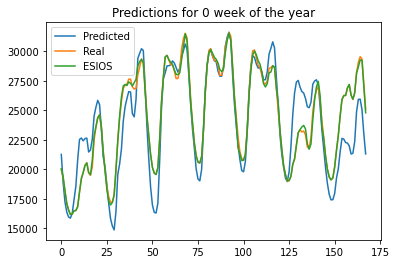

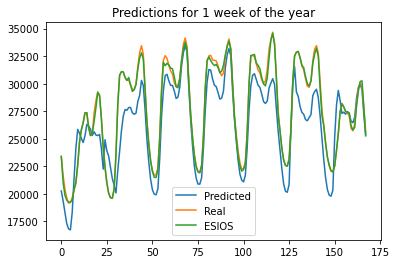

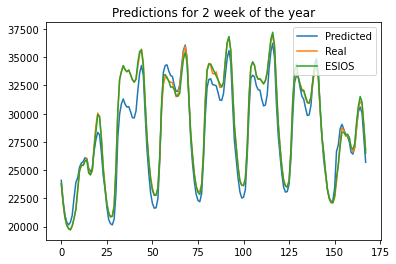

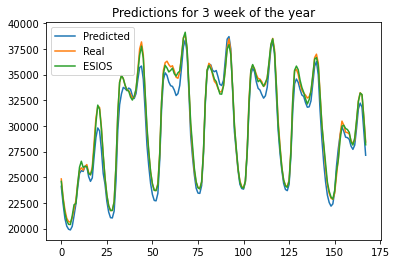

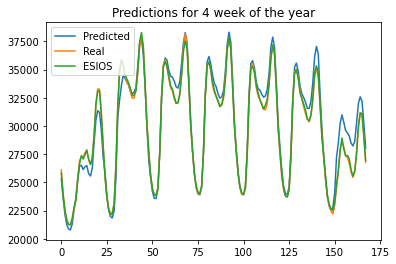

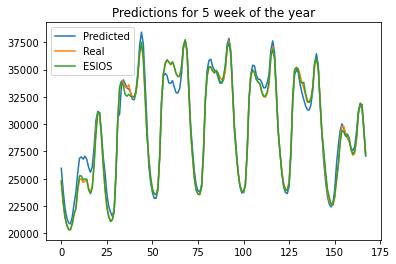

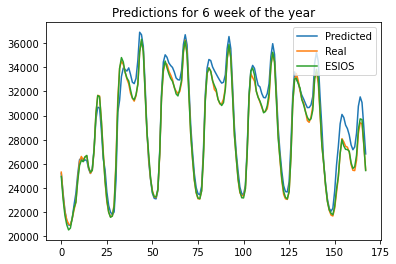

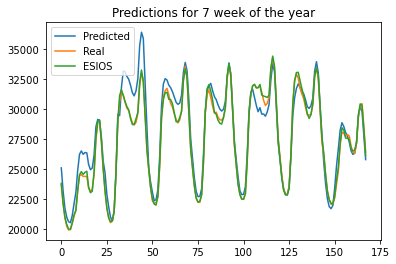

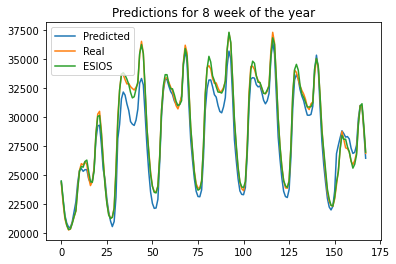

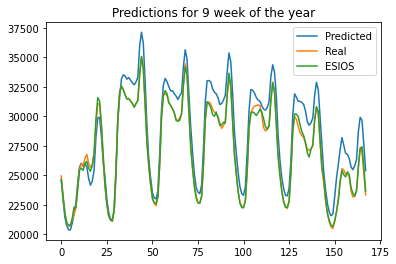

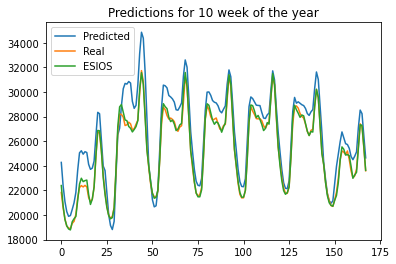

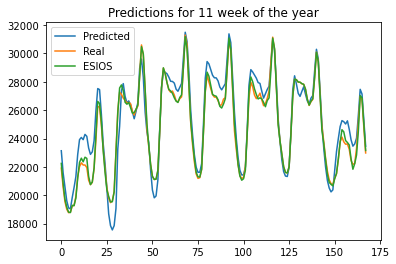

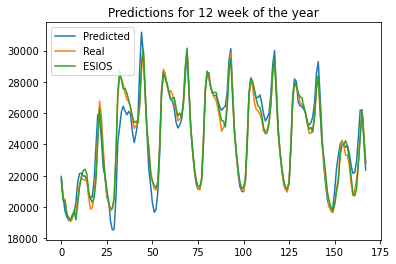

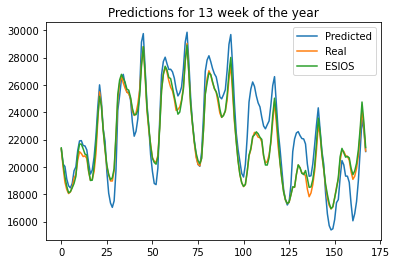

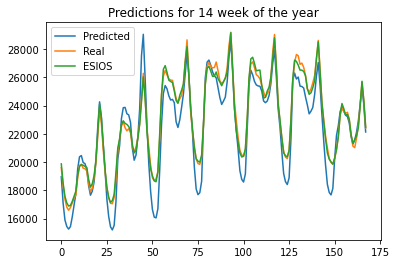

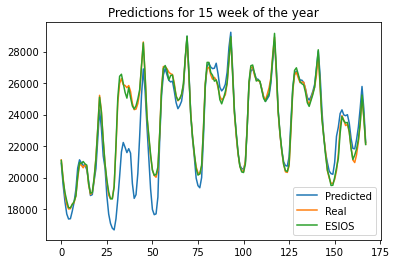

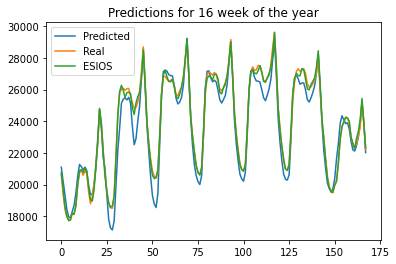

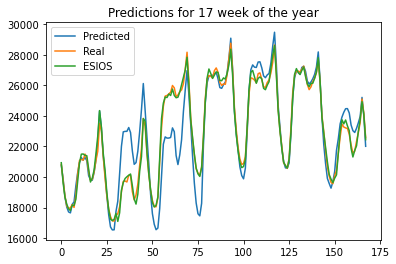

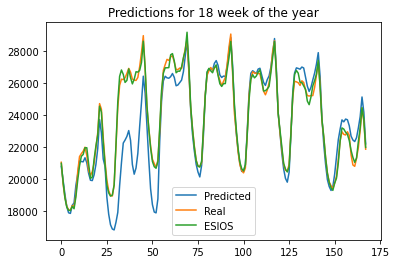

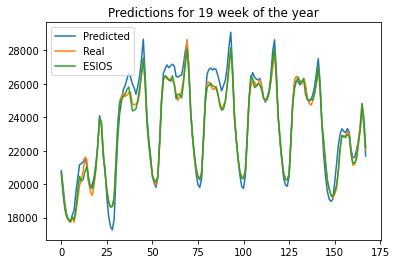

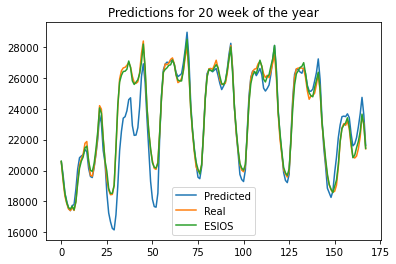

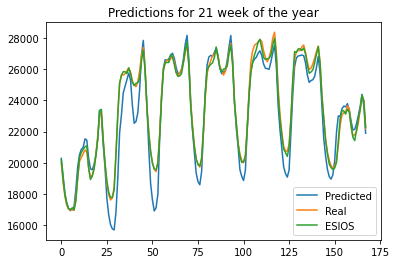

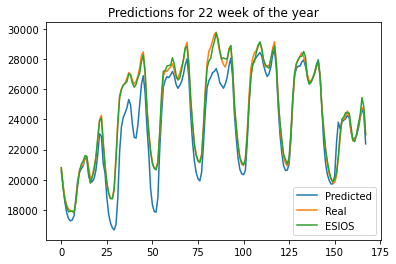

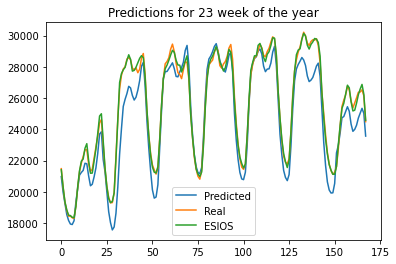

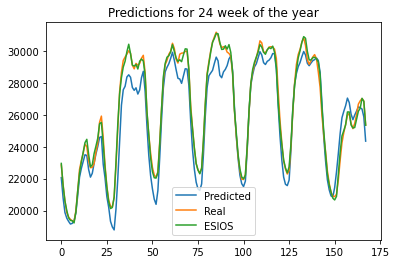

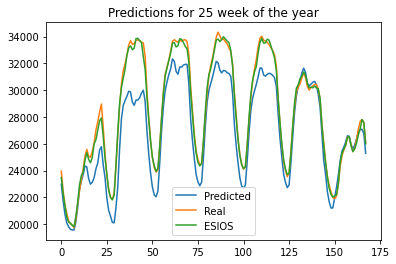

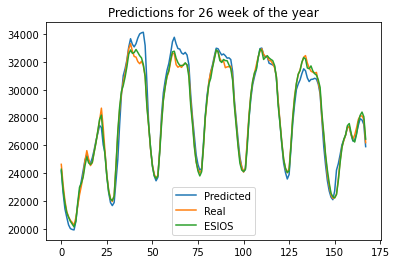

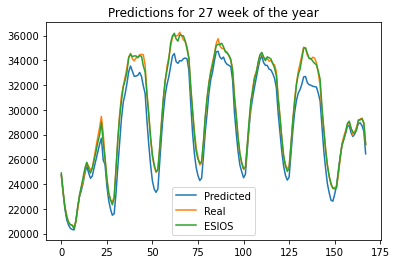

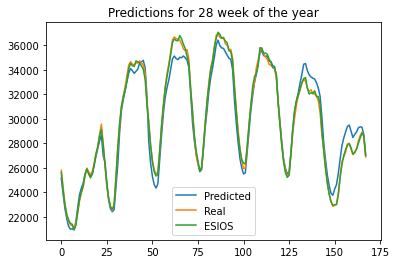

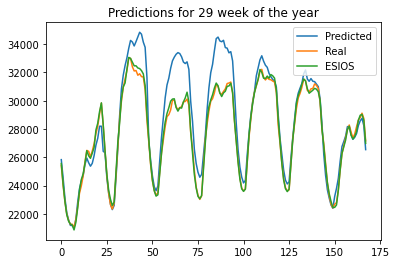

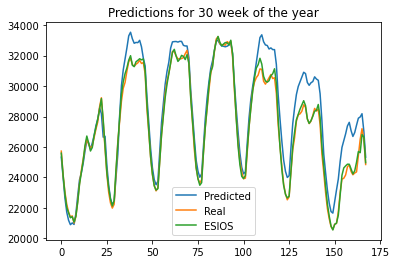

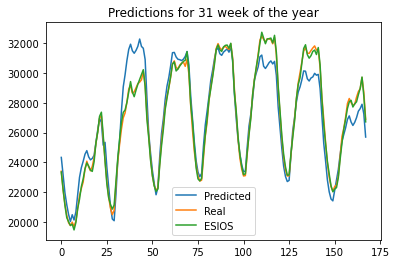

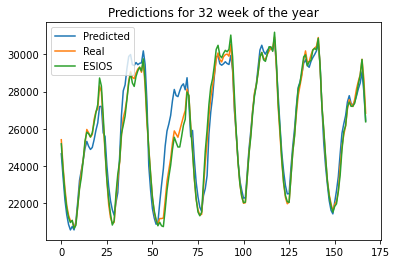

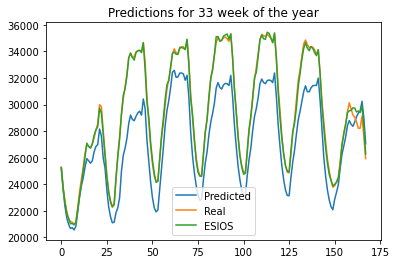

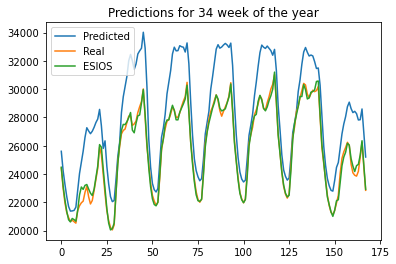

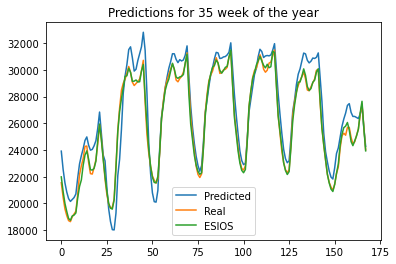

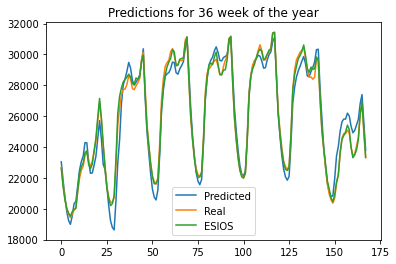

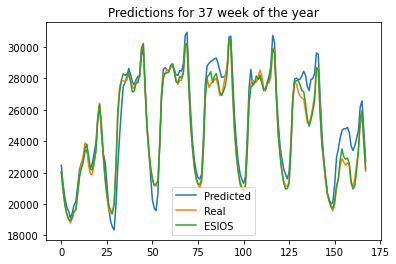

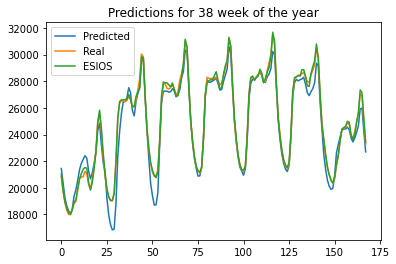

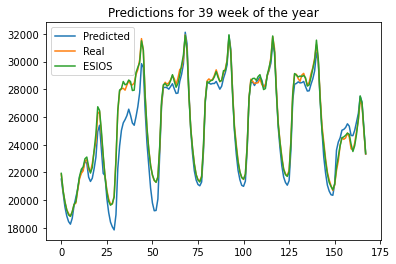

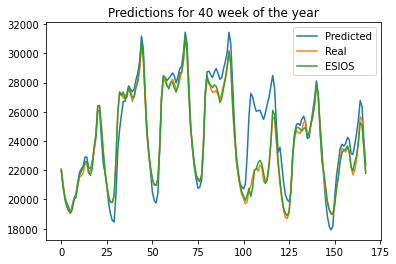

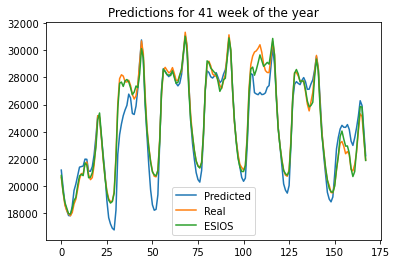

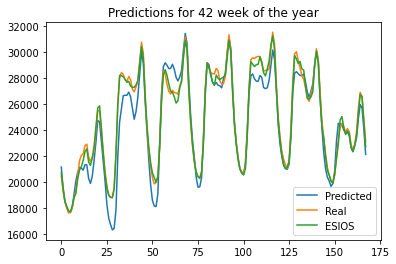

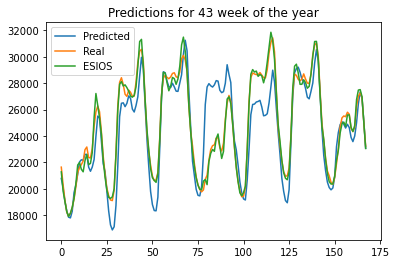

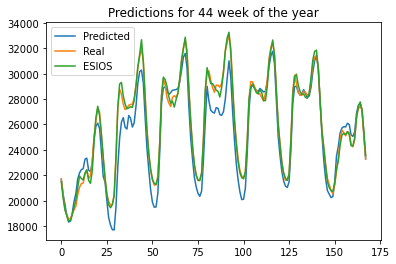

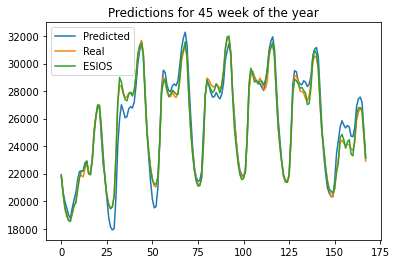

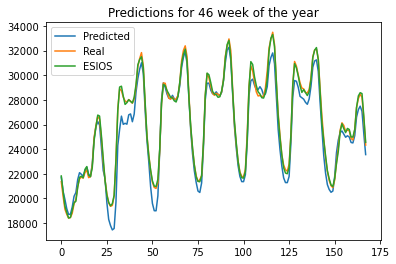

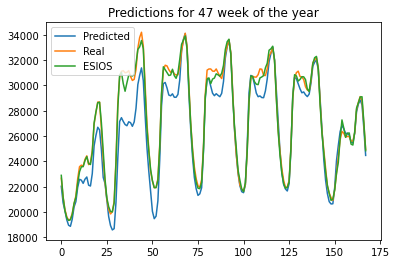

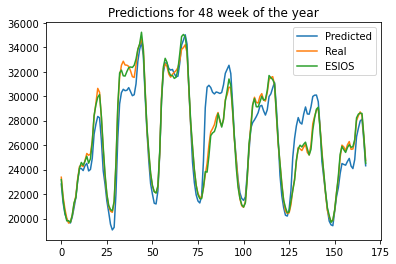

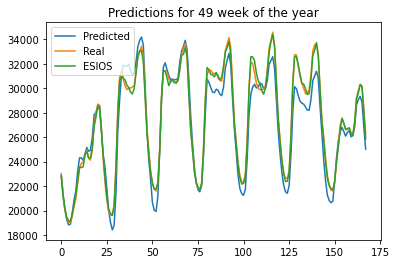

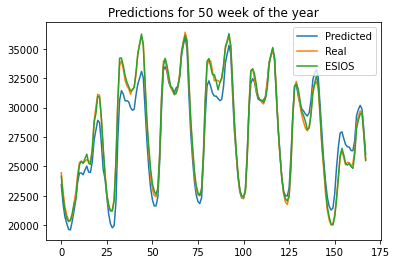

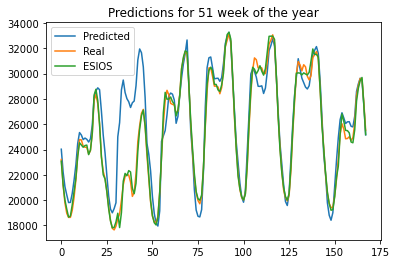

In [38]:
for i in range (52):
    plt.title ('Predictions for ' + str (i) + ' week of the year')
    plt.plot(NN_predictions[24*7*i:(i+1)*24*7], label='Predicted')
    plt.plot(y_test[24*7*i:(i+1)*24*7], label = 'Real')
    plt.plot(prevision_test[24*7*i:(i+1)*24*7], label='ESIOS')
    plt.legend()
    plt.show()

### 24h output

In [39]:
def build_input_NN (x,y,prevision):
    inputNN = []
    outputNN = []
    previsionNN = []
    for i in range (int(len(x)/24)):
        aux = []
        auxout = []
        auxprev = []
        for h in range (24):
            auxout.append(y[24*i+h])
            auxprev.append(prevision[24*i+h])
            if h == 0:
                for j in range (12):
                    aux.append(x[24*i+h][j])
            for element in x[24*i+h][12:]:
                aux.append(element)
        inputNN.append(aux)
        outputNN.append(auxout)
        previsionNN.append(auxprev)
    return inputNN, outputNN, previsionNN

In [40]:
x_train_NN, y_train_NN, prevision_train_NN = build_input_NN(x_train,y_train,prevision_train)
x_val_NN, y_val_NN, prevision_val_NN = build_input_NN(x_val,y_val,prevision_val)
x_test_NN, y_test_NN, prevision_test_NN = build_input_NN(x_test,y_test,prevision_test)

In [41]:
from tensorflow import keras
from keras import layers

input_shape = len(x_train_NN[0])
output_shape = len(y_test_NN[0])

NN_24h_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        #layers.Dense(output_shape, activation="relu"),
        layers.Dense(output_shape, activation="linear"),
    ]
)

In [42]:
batch_size = 256
epochs = 2000

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mean_absolute_error(y_true, y_pred):
        return (K.mean(abs(y_pred - y_true)))

def maximum_error(y_true, y_pred):
    return (K.max(abs(y_pred - y_true)))


NN_24h_model.compile(loss=root_mean_squared_error, optimizer="adam")
#model.compile(loss=mean_absolute_error, optimizer="adam")
#model.compile(loss=maximum_error, optimizer="adam")

x_trainaux = [list(x) for x in x_train_NN]
x_valaux = [list(x) for x in x_val_NN]

history = NN_24h_model.fit(x_trainaux, y_train_NN, validation_data = (x_valaux,y_val_NN), batch_size=batch_size, epochs=epochs)

Epoch 1/2000
12/12 [==============================] - 1s 38ms/step - loss: 33506.3086 - val_loss: 24199.2461
Epoch 2/2000
12/12 [==============================] - 0s 7ms/step - loss: 23633.3594 - val_loss: 19838.2383
Epoch 3/2000
12/12 [==============================] - 0s 7ms/step - loss: 18113.7051 - val_loss: 14635.7998
Epoch 4/2000
12/12 [==============================] - 0s 7ms/step - loss: 12960.6826 - val_loss: 10113.6875
Epoch 5/2000
12/12 [==============================] - 0s 8ms/step - loss: 8070.7554 - val_loss: 5747.4800
Epoch 6/2000
12/12 [==============================] - 0s 6ms/step - loss: 3974.6584 - val_loss: 3595.8335
Epoch 7/2000
12/12 [==============================] - 0s 7ms/step - loss: 2757.3494 - val_loss: 3364.1802
Epoch 8/2000
12/12 [==============================] - 0s 7ms/step - loss: 2490.5908 - val_loss: 2884.0300
Epoch 9/2000
12/12 [==============================] - 0s 7ms/step - loss: 2282.4790 - val_loss: 2403.7437
Epoch 10/2000
12/12 [================

12/12 [==============================] - 0s 7ms/step - loss: 1318.8688 - val_loss: 1322.4818
Epoch 154/2000
12/12 [==============================] - 0s 7ms/step - loss: 1325.9836 - val_loss: 1598.3726
Epoch 155/2000
12/12 [==============================] - 0s 7ms/step - loss: 1293.4774 - val_loss: 1302.0076
Epoch 156/2000
12/12 [==============================] - 0s 6ms/step - loss: 1305.8617 - val_loss: 1501.3958
Epoch 157/2000
12/12 [==============================] - 0s 7ms/step - loss: 1298.5378 - val_loss: 1685.6627
Epoch 158/2000
12/12 [==============================] - 0s 7ms/step - loss: 1297.2582 - val_loss: 1408.4380
Epoch 159/2000
12/12 [==============================] - 0s 6ms/step - loss: 1321.4713 - val_loss: 1560.4210
Epoch 160/2000
12/12 [==============================] - 0s 7ms/step - loss: 1347.0498 - val_loss: 1599.7679
Epoch 161/2000
12/12 [==============================] - 0s 6ms/step - loss: 1326.1042 - val_loss: 1300.5411
Epoch 162/2000
12/12 [=====================

Epoch 229/2000
12/12 [==============================] - 0s 7ms/step - loss: 1222.7499 - val_loss: 1245.3058
Epoch 230/2000
12/12 [==============================] - 0s 7ms/step - loss: 1187.4971 - val_loss: 1345.6097
Epoch 231/2000
12/12 [==============================] - 0s 7ms/step - loss: 1253.4076 - val_loss: 1600.5400
Epoch 232/2000
12/12 [==============================] - 0s 7ms/step - loss: 1342.5144 - val_loss: 1998.0099
Epoch 233/2000
12/12 [==============================] - 0s 8ms/step - loss: 1263.4807 - val_loss: 1176.9230
Epoch 234/2000
12/12 [==============================] - 0s 6ms/step - loss: 1243.3685 - val_loss: 1300.2390
Epoch 235/2000
12/12 [==============================] - 0s 7ms/step - loss: 1199.5227 - val_loss: 1213.6310
Epoch 236/2000
12/12 [==============================] - 0s 6ms/step - loss: 1170.9392 - val_loss: 1302.8989
Epoch 237/2000
12/12 [==============================] - 0s 7ms/step - loss: 1159.9148 - val_loss: 1234.8394
Epoch 238/2000
12/12 [======

Epoch 305/2000
12/12 [==============================] - 0s 6ms/step - loss: 1220.6644 - val_loss: 1164.5566
Epoch 306/2000
12/12 [==============================] - 0s 5ms/step - loss: 1184.5020 - val_loss: 1130.8231
Epoch 307/2000
12/12 [==============================] - 0s 5ms/step - loss: 1172.6493 - val_loss: 1118.7576
Epoch 308/2000
12/12 [==============================] - 0s 5ms/step - loss: 1224.9666 - val_loss: 1115.2190
Epoch 309/2000
12/12 [==============================] - 0s 5ms/step - loss: 1194.1395 - val_loss: 1112.7347
Epoch 310/2000
12/12 [==============================] - 0s 7ms/step - loss: 1138.9083 - val_loss: 1132.3964
Epoch 311/2000
12/12 [==============================] - 0s 6ms/step - loss: 1118.4546 - val_loss: 1235.7029
Epoch 312/2000
12/12 [==============================] - 0s 5ms/step - loss: 1133.8097 - val_loss: 1179.1840
Epoch 313/2000
12/12 [==============================] - 0s 6ms/step - loss: 1113.6705 - val_loss: 1169.9523
Epoch 314/2000
12/12 [======

Epoch 381/2000
12/12 [==============================] - 0s 7ms/step - loss: 1102.7883 - val_loss: 1221.0254
Epoch 382/2000
12/12 [==============================] - 0s 5ms/step - loss: 1079.4966 - val_loss: 1207.7139
Epoch 383/2000
12/12 [==============================] - 0s 6ms/step - loss: 1099.1895 - val_loss: 1069.5557
Epoch 384/2000
12/12 [==============================] - 0s 6ms/step - loss: 1080.4211 - val_loss: 1157.2008
Epoch 385/2000
12/12 [==============================] - 0s 6ms/step - loss: 1053.9172 - val_loss: 1075.8916
Epoch 386/2000
12/12 [==============================] - 0s 6ms/step - loss: 1076.6440 - val_loss: 1223.7037
Epoch 387/2000
12/12 [==============================] - 0s 6ms/step - loss: 1094.0778 - val_loss: 1213.1416
Epoch 388/2000
12/12 [==============================] - 0s 7ms/step - loss: 1056.1865 - val_loss: 1352.8364
Epoch 389/2000
12/12 [==============================] - 0s 5ms/step - loss: 1085.3647 - val_loss: 1474.2250
Epoch 390/2000
12/12 [======

Epoch 457/2000
12/12 [==============================] - 0s 6ms/step - loss: 1037.4452 - val_loss: 1121.6373
Epoch 458/2000
12/12 [==============================] - 0s 5ms/step - loss: 1121.2843 - val_loss: 1273.0131
Epoch 459/2000
12/12 [==============================] - 0s 6ms/step - loss: 1118.4396 - val_loss: 1060.7407
Epoch 460/2000
12/12 [==============================] - 0s 5ms/step - loss: 1171.0544 - val_loss: 1270.3042
Epoch 461/2000
12/12 [==============================] - 0s 6ms/step - loss: 1419.4351 - val_loss: 1067.0641
Epoch 462/2000
12/12 [==============================] - 0s 5ms/step - loss: 1180.1504 - val_loss: 1306.6716
Epoch 463/2000
12/12 [==============================] - 0s 5ms/step - loss: 1288.2345 - val_loss: 1081.9663
Epoch 464/2000
12/12 [==============================] - 0s 5ms/step - loss: 1184.9218 - val_loss: 1056.9603
Epoch 465/2000
12/12 [==============================] - 0s 5ms/step - loss: 1082.4720 - val_loss: 1223.5406
Epoch 466/2000
12/12 [======

Epoch 533/2000
12/12 [==============================] - 0s 5ms/step - loss: 1063.4862 - val_loss: 1341.9193
Epoch 534/2000
12/12 [==============================] - 0s 5ms/step - loss: 1023.7498 - val_loss: 1256.5715
Epoch 535/2000
12/12 [==============================] - 0s 5ms/step - loss: 1021.5870 - val_loss: 1065.3668
Epoch 536/2000
12/12 [==============================] - 0s 6ms/step - loss: 1015.1762 - val_loss: 1042.5516
Epoch 537/2000
12/12 [==============================] - 0s 6ms/step - loss: 1106.4014 - val_loss: 1182.3092
Epoch 538/2000
12/12 [==============================] - 0s 6ms/step - loss: 1055.3394 - val_loss: 1057.7079
Epoch 539/2000
12/12 [==============================] - 0s 5ms/step - loss: 1082.3376 - val_loss: 1444.2218
Epoch 540/2000
12/12 [==============================] - 0s 5ms/step - loss: 1039.9778 - val_loss: 1177.1936
Epoch 541/2000
12/12 [==============================] - 0s 6ms/step - loss: 1093.6720 - val_loss: 1074.7803
Epoch 542/2000
12/12 [======

Epoch 609/2000
12/12 [==============================] - 0s 5ms/step - loss: 1120.1936 - val_loss: 1808.5962
Epoch 610/2000
12/12 [==============================] - 0s 6ms/step - loss: 1197.7839 - val_loss: 1584.1497
Epoch 611/2000
12/12 [==============================] - 0s 6ms/step - loss: 1082.9540 - val_loss: 1340.4113
Epoch 612/2000
12/12 [==============================] - 0s 6ms/step - loss: 1048.6398 - val_loss: 1384.0591
Epoch 613/2000
12/12 [==============================] - 0s 6ms/step - loss: 1068.0754 - val_loss: 1063.5928
Epoch 614/2000
12/12 [==============================] - 0s 5ms/step - loss: 1054.4469 - val_loss: 1133.9620
Epoch 615/2000
12/12 [==============================] - 0s 5ms/step - loss: 1044.3141 - val_loss: 1260.3823
Epoch 616/2000
12/12 [==============================] - 0s 6ms/step - loss: 1057.2837 - val_loss: 1371.2722
Epoch 617/2000
12/12 [==============================] - 0s 6ms/step - loss: 1032.2245 - val_loss: 1097.7610
Epoch 618/2000
12/12 [======

12/12 [==============================] - 0s 6ms/step - loss: 1009.1063 - val_loss: 1184.4019
Epoch 686/2000
12/12 [==============================] - 0s 7ms/step - loss: 969.5201 - val_loss: 1432.0369
Epoch 687/2000
12/12 [==============================] - 0s 6ms/step - loss: 1037.8884 - val_loss: 1077.6294
Epoch 688/2000
12/12 [==============================] - 0s 6ms/step - loss: 983.1547 - val_loss: 1057.4268
Epoch 689/2000
12/12 [==============================] - 0s 7ms/step - loss: 989.8906 - val_loss: 1425.4954
Epoch 690/2000
12/12 [==============================] - 0s 6ms/step - loss: 1020.6842 - val_loss: 1134.9490
Epoch 691/2000
12/12 [==============================] - 0s 7ms/step - loss: 1008.2181 - val_loss: 1111.0464
Epoch 692/2000
12/12 [==============================] - 0s 6ms/step - loss: 1039.9460 - val_loss: 1017.2945
Epoch 693/2000
12/12 [==============================] - 0s 6ms/step - loss: 1069.0432 - val_loss: 1016.4305
Epoch 694/2000
12/12 [========================

12/12 [==============================] - 0s 6ms/step - loss: 992.3073 - val_loss: 1257.2921
Epoch 838/2000
12/12 [==============================] - 0s 6ms/step - loss: 988.7723 - val_loss: 1014.5325
Epoch 839/2000
12/12 [==============================] - 0s 6ms/step - loss: 986.7643 - val_loss: 1794.5417
Epoch 840/2000
12/12 [==============================] - 0s 6ms/step - loss: 1050.1061 - val_loss: 1042.8303
Epoch 841/2000
12/12 [==============================] - 0s 6ms/step - loss: 935.3232 - val_loss: 1176.0718
Epoch 842/2000
12/12 [==============================] - 0s 6ms/step - loss: 927.3820 - val_loss: 1141.8849
Epoch 843/2000
12/12 [==============================] - 0s 8ms/step - loss: 940.0181 - val_loss: 1240.8904
Epoch 844/2000
12/12 [==============================] - 0s 5ms/step - loss: 946.6177 - val_loss: 1165.2157
Epoch 845/2000
12/12 [==============================] - 0s 5ms/step - loss: 995.7402 - val_loss: 1073.7993
Epoch 846/2000
12/12 [=============================

12/12 [==============================] - 0s 7ms/step - loss: 945.8142 - val_loss: 1225.1475
Epoch 990/2000
12/12 [==============================] - 0s 5ms/step - loss: 917.9638 - val_loss: 1107.2321
Epoch 991/2000
12/12 [==============================] - 0s 6ms/step - loss: 910.9280 - val_loss: 1131.4064
Epoch 992/2000
12/12 [==============================] - 0s 6ms/step - loss: 924.9609 - val_loss: 1106.1693
Epoch 993/2000
12/12 [==============================] - 0s 7ms/step - loss: 930.0312 - val_loss: 1326.1416
Epoch 994/2000
12/12 [==============================] - 0s 7ms/step - loss: 1072.1987 - val_loss: 1694.5850
Epoch 995/2000
12/12 [==============================] - 0s 5ms/step - loss: 1188.7417 - val_loss: 1386.2853
Epoch 996/2000
12/12 [==============================] - 0s 5ms/step - loss: 945.6144 - val_loss: 1015.2017
Epoch 997/2000
12/12 [==============================] - 0s 6ms/step - loss: 954.5541 - val_loss: 1428.1390
Epoch 998/2000
12/12 [============================

12/12 [==============================] - 0s 6ms/step - loss: 952.9741 - val_loss: 1018.2310
Epoch 1066/2000
12/12 [==============================] - 0s 6ms/step - loss: 922.4582 - val_loss: 1152.5211
Epoch 1067/2000
12/12 [==============================] - 0s 6ms/step - loss: 931.2217 - val_loss: 1009.6932
Epoch 1068/2000
12/12 [==============================] - 0s 5ms/step - loss: 924.5854 - val_loss: 1378.0327
Epoch 1069/2000
12/12 [==============================] - 0s 5ms/step - loss: 934.7537 - val_loss: 1146.6759
Epoch 1070/2000
12/12 [==============================] - 0s 5ms/step - loss: 925.3862 - val_loss: 1647.5118
Epoch 1071/2000
12/12 [==============================] - 0s 6ms/step - loss: 1119.9170 - val_loss: 2019.9293
Epoch 1072/2000
12/12 [==============================] - 0s 6ms/step - loss: 1195.3915 - val_loss: 1551.8287
Epoch 1073/2000
12/12 [==============================] - 0s 6ms/step - loss: 1063.9330 - val_loss: 1829.1709
Epoch 1074/2000
12/12 [==================

Epoch 1141/2000
12/12 [==============================] - 0s 6ms/step - loss: 978.6576 - val_loss: 1109.4104
Epoch 1142/2000
12/12 [==============================] - 0s 5ms/step - loss: 912.0242 - val_loss: 1038.0850
Epoch 1143/2000
12/12 [==============================] - 0s 5ms/step - loss: 924.7656 - val_loss: 1019.4465
Epoch 1144/2000
12/12 [==============================] - 0s 5ms/step - loss: 926.8491 - val_loss: 1088.7639
Epoch 1145/2000
12/12 [==============================] - 0s 6ms/step - loss: 905.1516 - val_loss: 1124.2057
Epoch 1146/2000
12/12 [==============================] - 0s 6ms/step - loss: 896.4850 - val_loss: 1025.4264
Epoch 1147/2000
12/12 [==============================] - 0s 6ms/step - loss: 926.2166 - val_loss: 1146.2329
Epoch 1148/2000
12/12 [==============================] - 0s 6ms/step - loss: 1022.8629 - val_loss: 1607.8657
Epoch 1149/2000
12/12 [==============================] - 0s 6ms/step - loss: 1071.5450 - val_loss: 1773.5515
Epoch 1150/2000
12/12 [===

Epoch 1217/2000
12/12 [==============================] - 0s 6ms/step - loss: 909.6970 - val_loss: 916.2172
Epoch 1218/2000
12/12 [==============================] - 0s 5ms/step - loss: 915.6159 - val_loss: 1381.7559
Epoch 1219/2000
12/12 [==============================] - 0s 5ms/step - loss: 918.7951 - val_loss: 1060.4596
Epoch 1220/2000
12/12 [==============================] - 0s 7ms/step - loss: 908.8931 - val_loss: 950.1715
Epoch 1221/2000
12/12 [==============================] - 0s 6ms/step - loss: 896.3412 - val_loss: 1012.3973
Epoch 1222/2000
12/12 [==============================] - 0s 6ms/step - loss: 888.1585 - val_loss: 1016.8412
Epoch 1223/2000
12/12 [==============================] - 0s 6ms/step - loss: 891.5698 - val_loss: 1228.2571
Epoch 1224/2000
12/12 [==============================] - 0s 5ms/step - loss: 973.3860 - val_loss: 1456.1572
Epoch 1225/2000
12/12 [==============================] - 0s 6ms/step - loss: 952.6338 - val_loss: 1068.2690
Epoch 1226/2000
12/12 [=======

Epoch 1293/2000
12/12 [==============================] - 0s 5ms/step - loss: 1060.6213 - val_loss: 1302.7510
Epoch 1294/2000
12/12 [==============================] - 0s 5ms/step - loss: 947.8253 - val_loss: 1064.9844
Epoch 1295/2000
12/12 [==============================] - 0s 5ms/step - loss: 925.2264 - val_loss: 1208.3081
Epoch 1296/2000
12/12 [==============================] - 0s 6ms/step - loss: 963.5499 - val_loss: 926.5067
Epoch 1297/2000
12/12 [==============================] - 0s 6ms/step - loss: 921.9857 - val_loss: 1158.9043
Epoch 1298/2000
12/12 [==============================] - 0s 6ms/step - loss: 915.2623 - val_loss: 1168.3418
Epoch 1299/2000
12/12 [==============================] - 0s 5ms/step - loss: 937.7499 - val_loss: 915.1144
Epoch 1300/2000
12/12 [==============================] - 0s 6ms/step - loss: 980.2574 - val_loss: 903.7751
Epoch 1301/2000
12/12 [==============================] - 0s 5ms/step - loss: 957.3632 - val_loss: 906.9843
Epoch 1302/2000
12/12 [========

12/12 [==============================] - 0s 6ms/step - loss: 920.0111 - val_loss: 1658.1948
Epoch 1370/2000
12/12 [==============================] - 0s 7ms/step - loss: 1114.2448 - val_loss: 1192.6874
Epoch 1371/2000
12/12 [==============================] - 0s 7ms/step - loss: 919.1010 - val_loss: 1277.2122
Epoch 1372/2000
12/12 [==============================] - 0s 5ms/step - loss: 919.9474 - val_loss: 1178.0837
Epoch 1373/2000
12/12 [==============================] - 0s 6ms/step - loss: 889.7078 - val_loss: 1042.2491
Epoch 1374/2000
12/12 [==============================] - 0s 5ms/step - loss: 906.6183 - val_loss: 1103.5951
Epoch 1375/2000
12/12 [==============================] - 0s 5ms/step - loss: 925.9680 - val_loss: 927.5032
Epoch 1376/2000
12/12 [==============================] - 0s 5ms/step - loss: 932.3306 - val_loss: 1647.4702
Epoch 1377/2000
12/12 [==============================] - 0s 6ms/step - loss: 1025.8038 - val_loss: 1297.9895
Epoch 1378/2000
12/12 [====================

12/12 [==============================] - 0s 5ms/step - loss: 869.5761 - val_loss: 882.8727
Epoch 1522/2000
12/12 [==============================] - 0s 5ms/step - loss: 862.5533 - val_loss: 1055.9006
Epoch 1523/2000
12/12 [==============================] - 0s 6ms/step - loss: 836.3756 - val_loss: 995.4921
Epoch 1524/2000
12/12 [==============================] - 0s 6ms/step - loss: 903.5687 - val_loss: 937.5930
Epoch 1525/2000
12/12 [==============================] - 0s 6ms/step - loss: 917.9560 - val_loss: 1235.9625
Epoch 1526/2000
12/12 [==============================] - 0s 5ms/step - loss: 905.3046 - val_loss: 879.7112
Epoch 1527/2000
12/12 [==============================] - 0s 5ms/step - loss: 888.0204 - val_loss: 1063.6274
Epoch 1528/2000
12/12 [==============================] - 0s 7ms/step - loss: 910.6982 - val_loss: 1022.9142
Epoch 1529/2000
12/12 [==============================] - 0s 6ms/step - loss: 933.3123 - val_loss: 900.4898
Epoch 1530/2000
12/12 [==========================

12/12 [==============================] - 0s 5ms/step - loss: 1026.7410 - val_loss: 898.1460
Epoch 1674/2000
12/12 [==============================] - 0s 5ms/step - loss: 872.4921 - val_loss: 989.4999
Epoch 1675/2000
12/12 [==============================] - 0s 6ms/step - loss: 870.8050 - val_loss: 1003.2102
Epoch 1676/2000
12/12 [==============================] - 0s 6ms/step - loss: 838.7919 - val_loss: 931.3481
Epoch 1677/2000
12/12 [==============================] - 0s 7ms/step - loss: 832.0328 - val_loss: 1159.5314
Epoch 1678/2000
12/12 [==============================] - 0s 5ms/step - loss: 895.2484 - val_loss: 981.2538
Epoch 1679/2000
12/12 [==============================] - 0s 5ms/step - loss: 885.9280 - val_loss: 866.9150
Epoch 1680/2000
12/12 [==============================] - 0s 6ms/step - loss: 875.5310 - val_loss: 1176.8971
Epoch 1681/2000
12/12 [==============================] - 0s 7ms/step - loss: 883.2146 - val_loss: 1099.0176
Epoch 1682/2000
12/12 [=========================

12/12 [==============================] - 0s 7ms/step - loss: 843.2009 - val_loss: 855.6882
Epoch 1826/2000
12/12 [==============================] - 0s 6ms/step - loss: 840.6824 - val_loss: 1189.4197
Epoch 1827/2000
12/12 [==============================] - 0s 8ms/step - loss: 832.7173 - val_loss: 842.0526
Epoch 1828/2000
12/12 [==============================] - 0s 5ms/step - loss: 901.6329 - val_loss: 917.4634
Epoch 1829/2000
12/12 [==============================] - 0s 6ms/step - loss: 797.9234 - val_loss: 984.2267
Epoch 1830/2000
12/12 [==============================] - 0s 8ms/step - loss: 825.7130 - val_loss: 910.1588
Epoch 1831/2000
12/12 [==============================] - 0s 5ms/step - loss: 820.4338 - val_loss: 818.2664
Epoch 1832/2000
12/12 [==============================] - 0s 6ms/step - loss: 852.2477 - val_loss: 841.4661
Epoch 1833/2000
12/12 [==============================] - 0s 7ms/step - loss: 967.4631 - val_loss: 870.4045
Epoch 1834/2000
12/12 [=============================

12/12 [==============================] - 0s 6ms/step - loss: 821.6300 - val_loss: 1011.4305
Epoch 1978/2000
12/12 [==============================] - 0s 5ms/step - loss: 1011.3525 - val_loss: 886.7866
Epoch 1979/2000
12/12 [==============================] - 0s 6ms/step - loss: 915.8961 - val_loss: 895.1313
Epoch 1980/2000
12/12 [==============================] - 0s 6ms/step - loss: 877.1307 - val_loss: 1033.2516
Epoch 1981/2000
12/12 [==============================] - 0s 6ms/step - loss: 825.0468 - val_loss: 962.8639
Epoch 1982/2000
12/12 [==============================] - 0s 6ms/step - loss: 822.5101 - val_loss: 1234.8173
Epoch 1983/2000
12/12 [==============================] - 0s 6ms/step - loss: 910.0247 - val_loss: 1434.0985
Epoch 1984/2000
12/12 [==============================] - 0s 6ms/step - loss: 929.0383 - val_loss: 1147.0443
Epoch 1985/2000
12/12 [==============================] - 0s 7ms/step - loss: 808.7382 - val_loss: 1134.7561
Epoch 1986/2000
12/12 [=======================

In [43]:
x_testaux = [list(x) for x in x_test_NN]

NN_24h_predictions = NN_24h_model.predict(x_testaux)
df_NN_24h, NN_24h_metrics = metrics(flatten_extend(NN_24h_predictions), flatten_extend(y_test_NN))
NN_24h_metrics

12/12 [==============================] - 0s 457us/step
[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1483.5317600115936, 1147.8457900410247, 4.4469103608402305, 7337.223310624999]

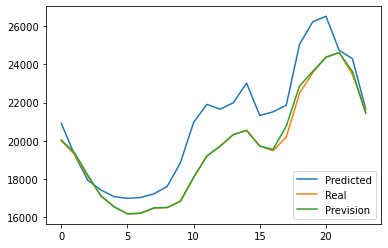

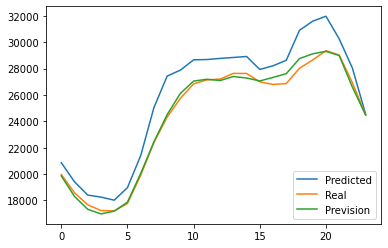

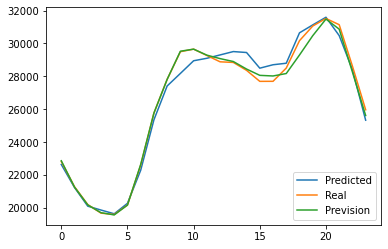

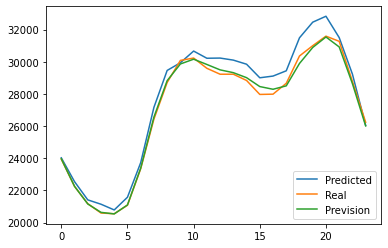

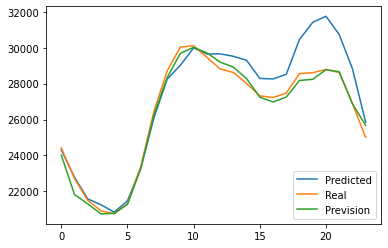

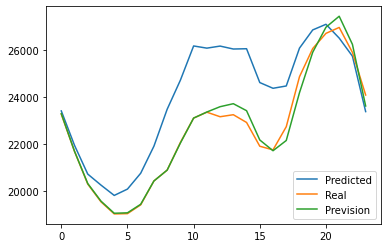

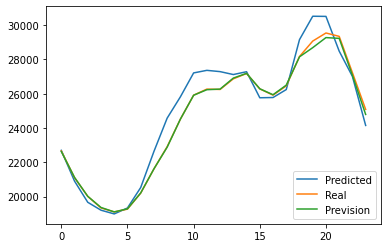

In [44]:
for i in range (len(NN_24h_predictions[8*7:9*7])):
    plt.plot(NN_24h_predictions[i], label='Predicted')
    plt.plot(y_test_NN[i], label='Real')
    plt.plot(prevision_test_NN[i], label='Prevision')
    plt.legend(loc='lower right')
    plt.show()

# Error analysis

In [45]:
errors = {}
errors['Linear'] = linear_metrics
# errors['SVR'] = SVR_metrics
errors['XGBoost'] = XGB_metrics
errors['AutoReg'] = AR_metrics
errors['SkForecast'] = AR_XGB_metrics
errors['NN'] = NN_metrics
errors['NN 24h'] = NN_24h_metrics

errors = pd.DataFrame (errors)

errors = errors.rename(index={0: 'RMSE', 1: 'MAE', 2:'MAPE', 3:'MAX'})

errors

Linear      XGBoost       AutoReg    SkForecast           NN  \
RMSE  1262.722877  1021.146280   1365.231555   1187.188229  1384.100136   
MAE    935.756284   747.384270    888.369014    772.789153   997.819819   
MAPE     3.624242     2.887263      3.420515      2.999411     3.867623   
MAX   6947.238981  7550.187500  12121.901252  10948.171221  8740.098955   

           NN 24h  
RMSE  1483.531760  
MAE   1147.845790  
MAPE     4.446910  
MAX   7337.223311

In [46]:
df_errors = {}
df_errors ['Linear'] = df_linear
# df_errors ['SVR'] = df_SVR
df_errors ['XGBoost'] = df_XGB
df_errors ['AR'] = df_AR
df_errors ['Skforecast'] = df_AR_XGB
df_errors ['NN'] = df_NN
df_errors ['NN 24h'] = df_NN_24h



In [47]:
def hourly_error (type_of_error):
    errors_horas = {name:[] for name in df_errors.keys()}
    for name in errors_horas.keys():
        for i in range (24):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour == i]
            if type_of_error == 'RMSE':
                errors_horas[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_horas[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_horas[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_horas[name].append(max(auxdf['Relative Error']))
            
    errors_horas = pd.DataFrame (errors_horas)
    plt.title(type_of_error + ' based on hour of the day')
    plt.xlabel('Hour')
    plt.plot(errors_horas, label=errors_horas.columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()
    return errors_horas

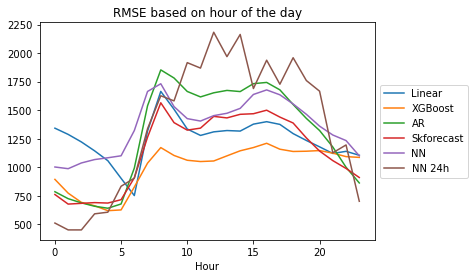

In [48]:
errors_horas_rmse = hourly_error ('RMSE')

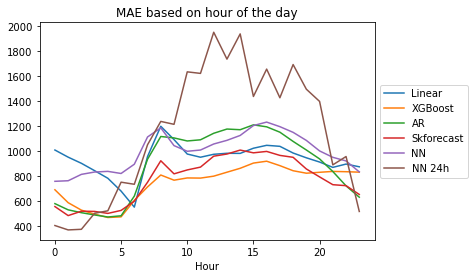

In [49]:
errors_horas_rmse = hourly_error ('MAE')

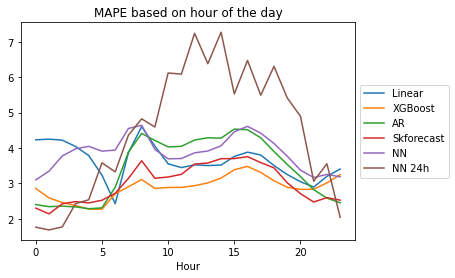

In [50]:
errors_horas_rmse = hourly_error ('MAPE')

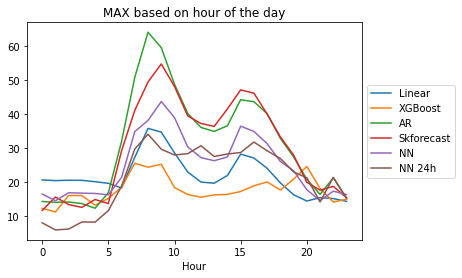

In [51]:
errors_horas_rmse = hourly_error ('MAX')

In [52]:
def weekly_error(type_of_error):
    errors_weekly = {name: [] for name in df_errors.keys()}
    for name in errors_weekly.keys():
        for i in range(7):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.weekday == i]
            if type_of_error == 'RMSE':
                errors_weekly[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_weekly[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_weekly[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_weekly[name].append(max(auxdf['Absolute Error']))

    # Plot each set of errors separately
    for name, errors in errors_weekly.items():
        plt.plot(range(7), errors, label=name)  # Assuming 0-6 corresponds to Monday-Sunday
        
    plt.title(type_of_error + ' based on weekday')
    plt.xlabel('Day of the week')
    plt.xticks(range(7), ['L', 'M', 'X', 'J', 'V', 'S', 'D'])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    errors_weekly = pd.DataFrame(errors_weekly)
    return errors_weekly

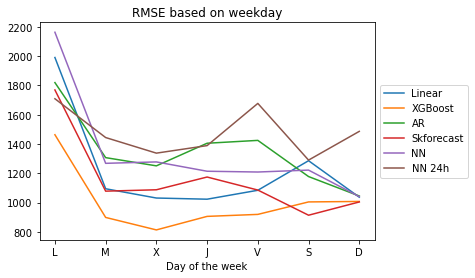

In [53]:
errors_weekly_rmse = weekly_error ('RMSE')

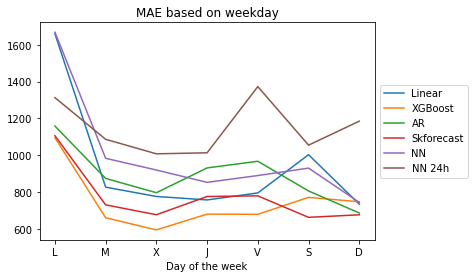

In [54]:
errors_weekly_rmse = weekly_error ('MAE')

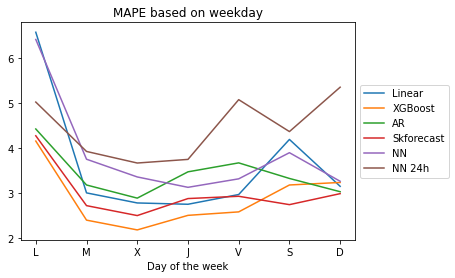

In [55]:
errors_weekly_rmse = weekly_error ('MAPE')

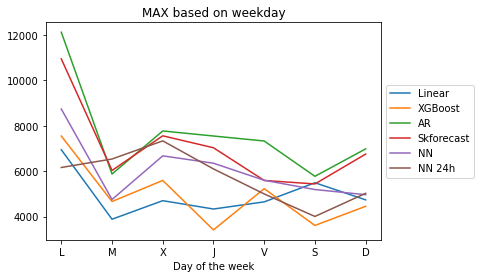

In [56]:
errors_weekly_rmse = weekly_error ('MAX')

In [57]:
## Histograms

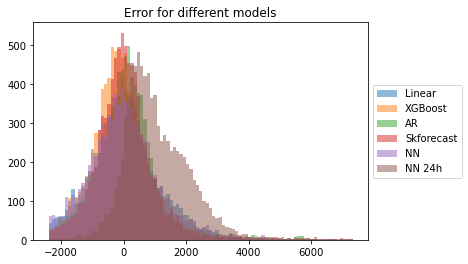

In [58]:
nbins = int (np.sqrt(len(y_test)))
# print (nbins)

for name in df_errors.keys():
    max_value = 0
    min_value = 0
    if max(df_errors[name]['Error']) >= max_value:
        max_value = max(df_errors[name]['Error'])
    if min(df_errors[name]['Error']) <= min_value:
        min_value = min(df_errors[name]['Error'])
bin_edges = np.linspace(min_value, max_value, nbins + 1)

plt.title('Error for different models')
for name in df_errors.keys():
    plt.hist(df_errors[name]['Error'], bins = bin_edges, label=name, alpha=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [59]:
variables = ['mean', 'sigma', 'mean+-1sigma', 'mean+-2sigma', 'mean+-3sigma', 'mean+-4sigma']
nsigmas = 4

error_stats = pd.DataFrame()

for name in df_errors.keys():
    aux = []
    length = len(df_errors[name])
    mean = np.mean(df_errors[name]['Error'])
    aux.append(mean)
    sigma = np.std(df_errors[name]['Error'])
    aux.append(sigma)
    for n in range(1,nsigmas+1):
        auxdf = df_errors[name][(df_errors[name]['Error']>=mean-n*sigma) & (df_errors[name]['Error']<=mean+n*sigma)]
        aux.append(len(auxdf)/length)
    error_stats [name] = aux

error_stats.index = variables
error_stats

Linear      XGBoost           AR   Skforecast           NN  \
mean           -72.848018  -194.507871    10.805929    22.486662  -128.910316   
sigma         1260.619781  1002.450205  1365.188789  1186.975249  1378.083929   
mean+-1sigma     0.729110     0.747374     0.817922     0.812900     0.757534   
mean+-2sigma     0.941096     0.945434     0.943379     0.952397     0.940639   
mean+-3sigma     0.990639     0.987671     0.976370     0.979795     0.985731   
mean+-4sigma     0.998630     0.996461     0.990982     0.991324     0.996804   

                   NN 24h  
mean          1060.902277  
sigma         1036.992209  
mean+-1sigma     0.733562  
mean+-2sigma     0.956507  
mean+-3sigma     0.989498  
mean+-4sigma     0.995890

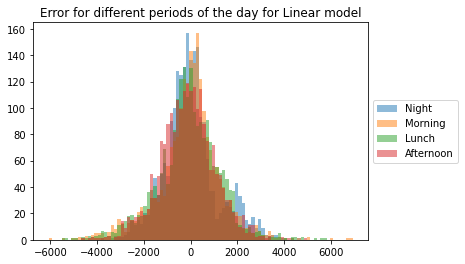

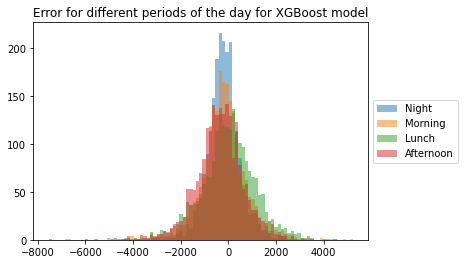

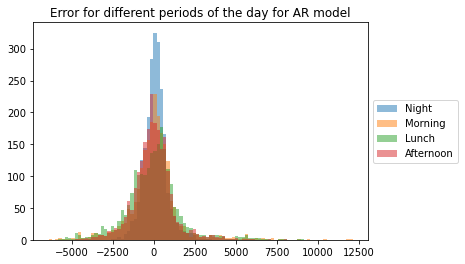

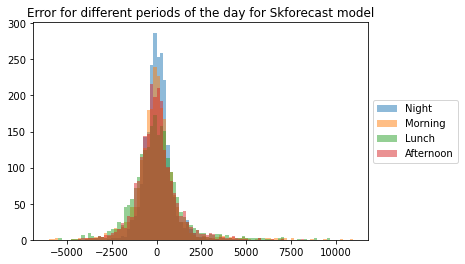

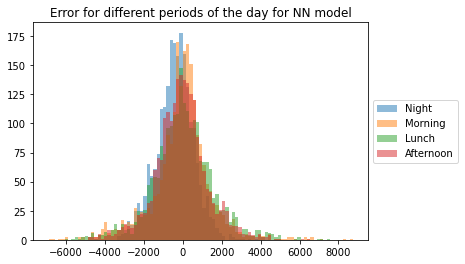

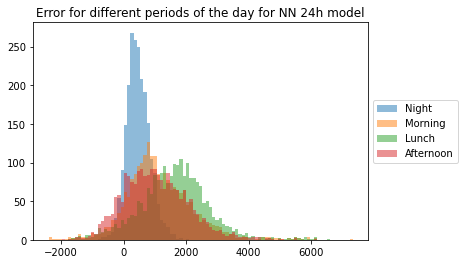

In [60]:
day_division = {
    'Night': [x for x in range (6)],
    'Morning': [x for x in range (6,12)],
    'Lunch': [x for x in range (12, 18)],
    'Afternoon': [x for x in range (18,24)]
    
}

nbins = int (np.sqrt(len(y_test)))
# print (nbins)

for name in df_errors.keys():
    plt.title('Error for different periods of the day for '+name+' model')
    max_value = 0
    min_value = 0
    for period in day_division.keys():
        auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
        if max(auxdf['Error']) >= max_value:
            max_value = max(auxdf['Error'])
        if min(auxdf['Error']) <= min_value:
            min_value = min(auxdf['Error'])
    bin_edges = np.linspace(min_value, max_value, nbins + 1)
    for period in day_division.keys():
        auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
        plt.hist(auxdf['Error'], bins = bin_edges, label=period, alpha=0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()